In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
hous_pred_df = pd.read_csv('house_train.csv')
print(hous_pred_df.info())
print(hous_pred_df.head(10))
print(hous_pred_df.describe())
print(hous_pred_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
hous_pred_corr = hous_pred_df.corr()
hous_pred_corr

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

<AxesSubplot:>

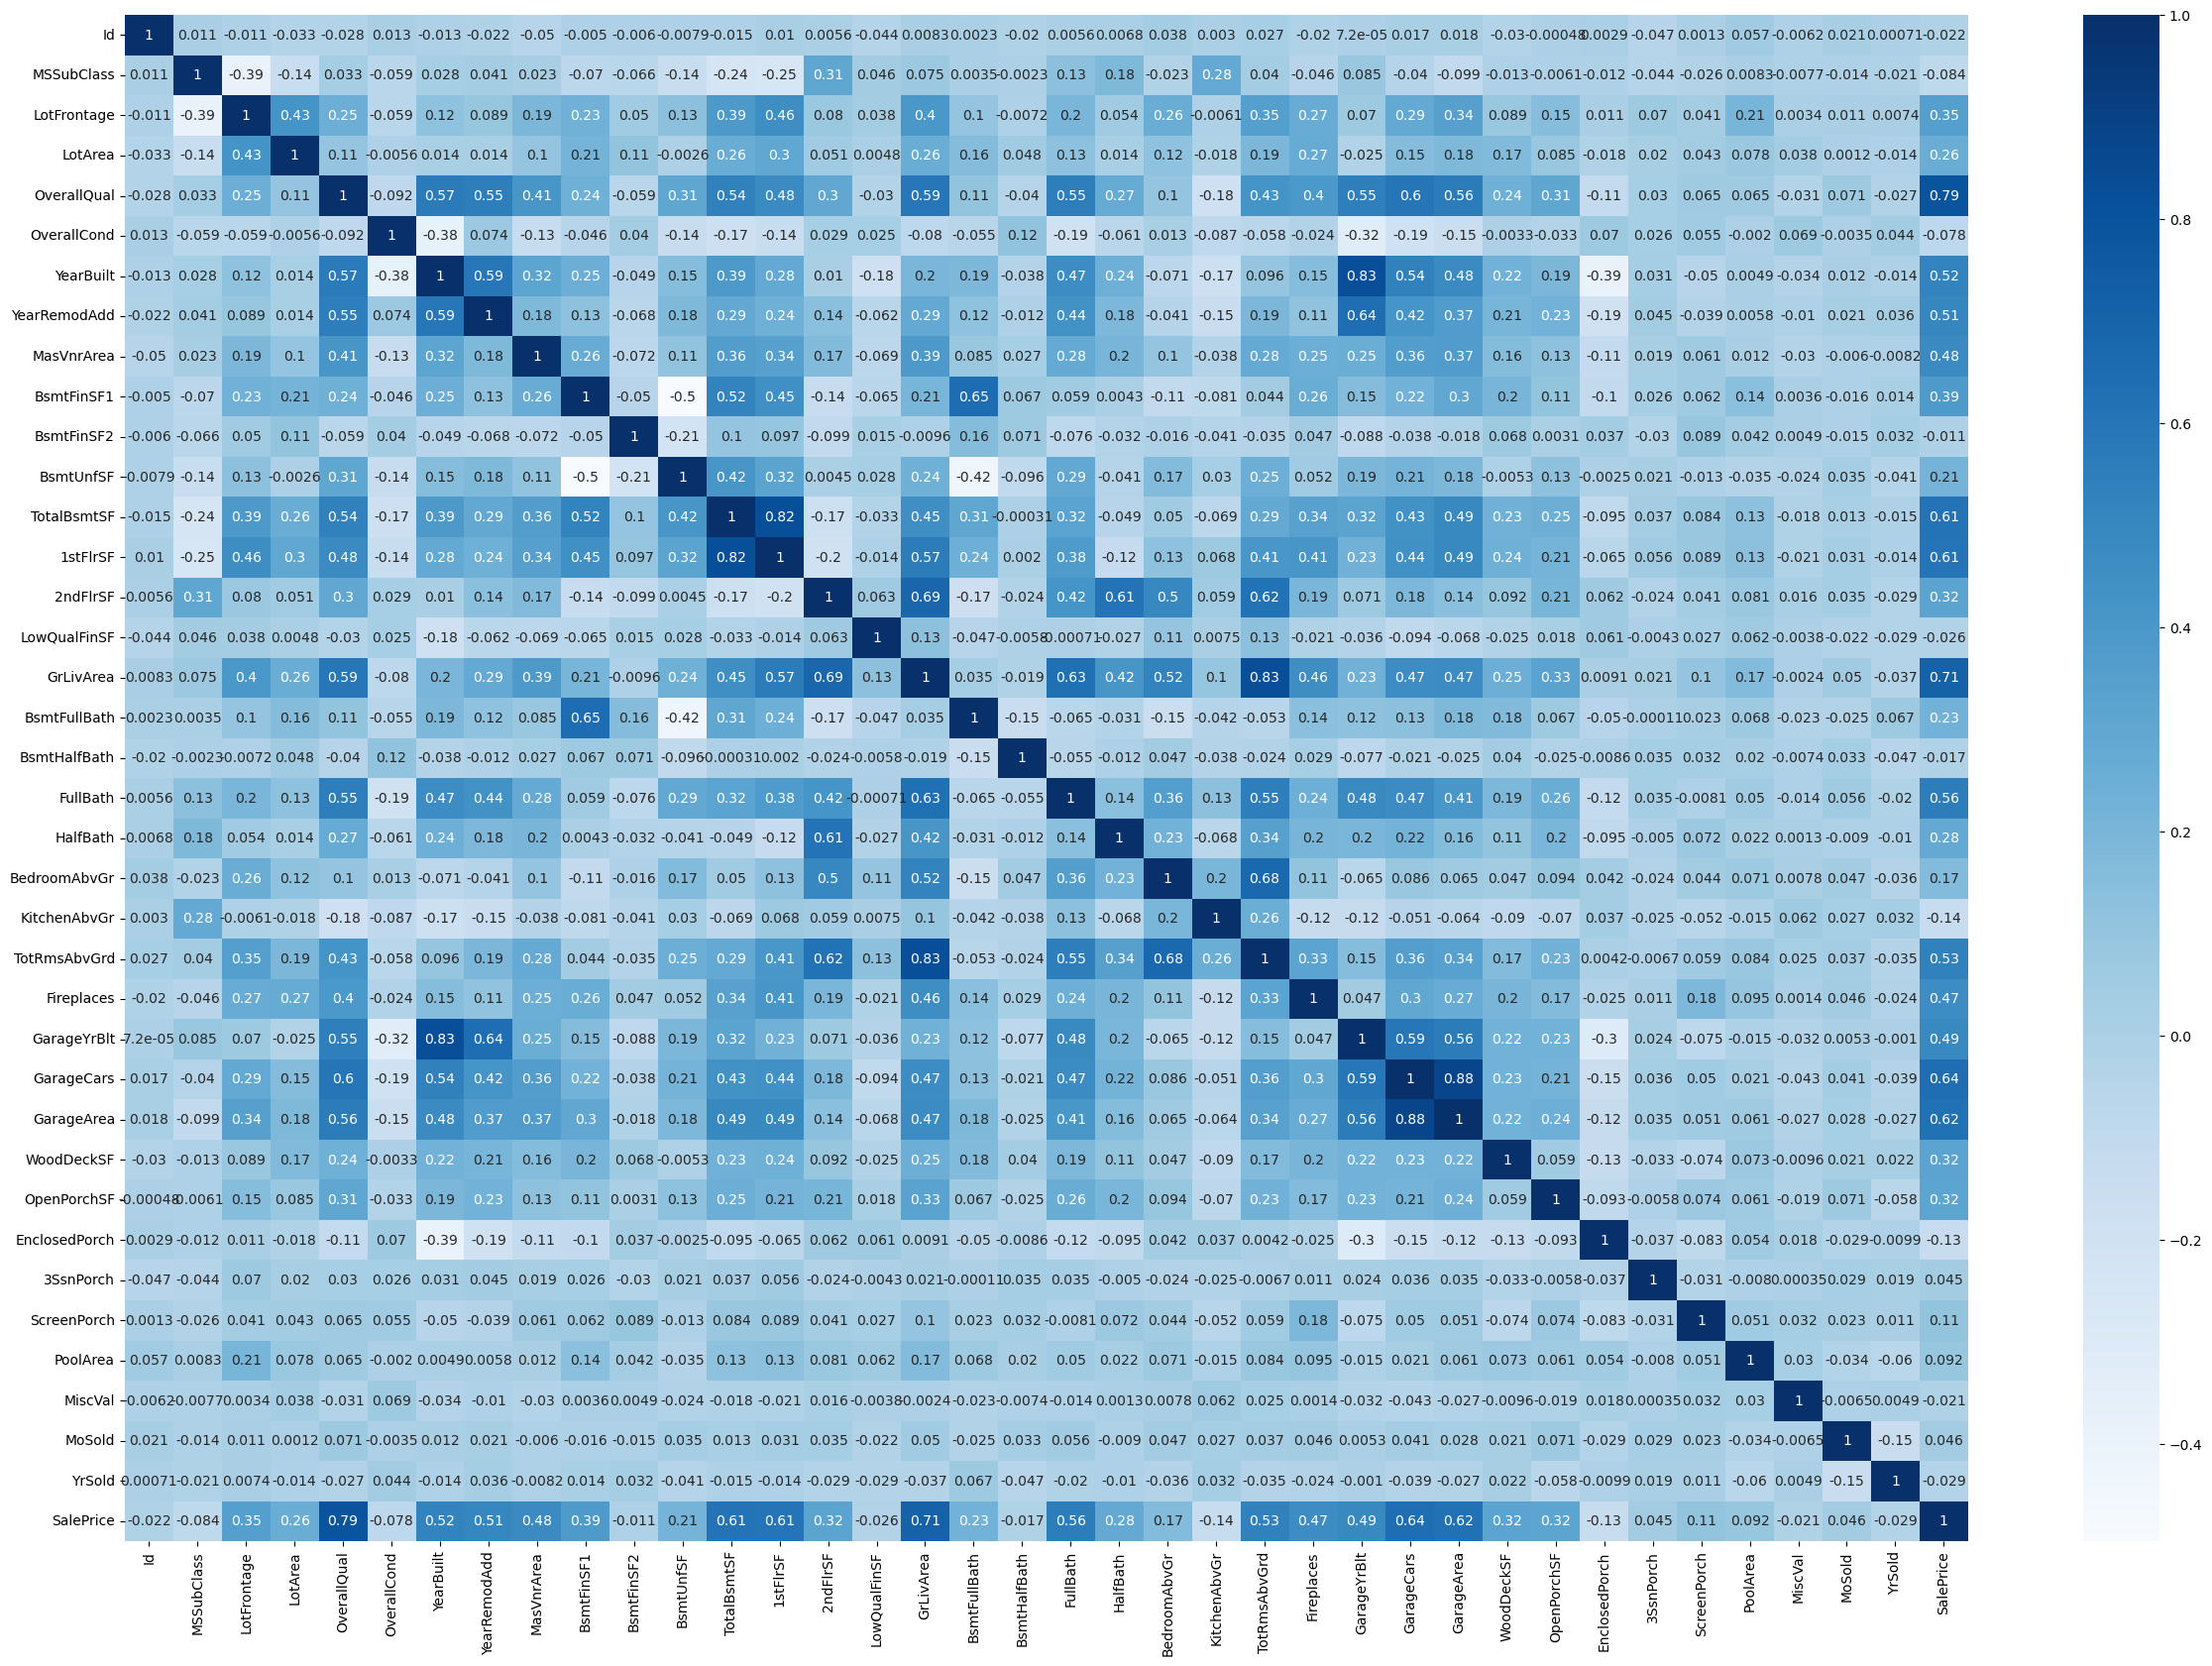

In [6]:
plt.figure(figsize = (30,20))
sns.heatmap(hous_pred_corr,cmap='Blues',annot=True)

In [7]:
hous_pred_df.loc[:, hous_pred_df.isnull().any()].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
hous_pred_df_copy = hous_pred_df
colswithhnull = ['Id','Alley','PoolQC','Fence','MiscFeature']
for col in colswithhnull:
    hous_pred_df = hous_pred_df.drop(col,axis=1)

In [9]:
print(hous_pred_df.shape)
print(hous_pred_df_copy.shape)

(1460, 76)
(1460, 81)


In [10]:
hous_cat_cols = ['MSZoning', 'Street',
                 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                 'HouseStyle','RoofStyle', 'RoofMatl', 
                 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 
                 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',  
                 'Heating','HeatingQC', 'CentralAir', 'Electrical', 
                 'KitchenQual','Functional', 'FireplaceQu', 
                 'GarageType','GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 
                 'SaleType','SaleCondition']

In [11]:
hous_pred_df_cat=hous_pred_df.loc[:,hous_cat_cols] 
hous_pred_df_cat.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional FireplaceQu  \
0      CollgCr       Norm       Norm  ...          Gd        Typ         NaN   
1      Veenker      Feedr       Norm  ...          TA        Typ          TA   
2      CollgCr       Norm       Norm  ...          Gd        Typ          TA   
3      Crawfor       Norm       Norm  ...          Gd        Typ          Gd   
4      NoRidge       Norm       Norm  ...          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 39 columns]

In [12]:
hous_pred_df_noncat = hous_pred_df.drop(columns=hous_cat_cols)
hous_pred_df_noncat.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

In [13]:
from sklearn.impute import SimpleImputer
SI = SimpleImputer(missing_values = np.nan,strategy='mean')
hous_pred_df_noncat_new = SI.fit_transform(hous_pred_df_noncat)
hous_pred_df_noncat_new=pd.DataFrame(hous_pred_df_noncat_new,columns=hous_pred_df_noncat.columns,index=hous_pred_df_noncat.index)

In [14]:
hous_pred_df_noncat_new.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        60.0         65.0   8450.0          7.0          5.0     2003.0   
1        20.0         80.0   9600.0          6.0          8.0     1976.0   
2        60.0         68.0  11250.0          7.0          5.0     2001.0   
3        70.0         60.0   9550.0          7.0          5.0     1915.0   
4        60.0         84.0  14260.0          8.0          5.0     2000.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0        2003.0       196.0       706.0         0.0  ...         0.0   
1        1976.0         0.0       978.0         0.0  ...       298.0   
2        2002.0       162.0       486.0         0.0  ...         0.0   
3        1970.0         0.0       216.0         0.0  ...         0.0   
4        2000.0       350.0       655.0         0.0  ...       192.0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0         61.0            0.0        0.0          0.0       0.0      0.0   
1          0.0            0.0        0.0          0.0       0.0      0.0   
2         42.0            0.0        0.0          0.0       0.0      0.0   
3         35.0          272.0        0.0          0.0       0.0      0.0   
4         84.0            0.0        0.0          0.0       0.0      0.0   

   MoSold  YrSold  SalePrice  
0     2.0  2008.0   208500.0  
1     5.0  2007.0   181500.0  
2     9.0  2008.0   223500.0  
3     2.0  2006.0   140000.0  
4    12.0  2008.0   250000.0  

[5 rows x 37 columns]

In [15]:
hous_pred_df_new_cat=SimpleImputer(strategy='most_frequent').fit_transform(hous_pred_df_cat)
hous_pred_df_new_cat=pd.DataFrame(hous_pred_df_new_cat,columns=hous_pred_df_cat.columns,index=hous_pred_df_cat.index)
for col in hous_pred_df_new_cat.columns:
    hous_pred_df_new_cat[col]=hous_pred_df_new_cat[col].astype('category')    
    
for col in hous_pred_df_new_cat.columns:
    hous_pred_df_new_cat[col]=hous_pred_df_new_cat[col].cat.codes 

In [16]:
hous_pred_df_new_cat.head()

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         3       1         3            3          0          4          0   
1         3       1         3            3          0          2          0   
2         3       1         0            3          0          4          0   
3         3       1         0            3          0          0          0   
4         3       1         0            3          0          2          0   

   Neighborhood  Condition1  Condition2  ...  KitchenQual  Functional  \
0             5           2           2  ...            2           6   
1            24           1           2  ...            3           6   
2             5           2           2  ...            2           6   
3             6           2           2  ...            2           6   
4            15           2           2  ...            2           6   

   FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0            2           1             1           4           4           2   
1            4           1             1           4           4           2   
2            4           1             1           4           4           2   
3            2           5             2           4           4           2   
4            4           1             1           4           4           2   

   SaleType  SaleCondition  
0         8              4  
1         8              4  
2         8              4  
3         8              0  
4         8              4  

[5 rows x 39 columns]

In [17]:
hous_pred_df_new=pd.concat([hous_pred_df_new_cat,hous_pred_df_noncat_new],axis=1) 

In [18]:
hous_pred_df_new.head(10)

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         3       1         3            3          0          4          0   
1         3       1         3            3          0          2          0   
2         3       1         0            3          0          4          0   
3         3       1         0            3          0          0          0   
4         3       1         0            3          0          2          0   
5         3       1         0            3          0          4          0   
6         3       1         3            3          0          4          0   
7         3       1         0            3          0          0          0   
8         4       1         3            3          0          4          0   
9         3       1         3            3          0          0          0   

   Neighborhood  Condition1  Condition2  ...  WoodDeckSF  OpenPorchSF  \
0             5           2           2  ...         0.0         61.0   
1            24           1           2  ...       298.0          0.0   
2             5           2           2  ...         0.0         42.0   
3             6           2           2  ...         0.0         35.0   
4            15           2           2  ...       192.0         84.0   
5            11           2           2  ...        40.0         30.0   
6            21           2           2  ...       255.0         57.0   
7            14           4           2  ...       235.0        204.0   
8            17           0           2  ...        90.0          0.0   
9             3           0           0  ...         0.0          4.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0            0.0        0.0          0.0       0.0      0.0     2.0  2008.0   
1            0.0        0.0          0.0       0.0      0.0     5.0  2007.0   
2            0.0        0.0          0.0       0.0      0.0     9.0  2008.0   
3          272.0        0.0          0.0       0.0      0.0     2.0  2006.0   
4            0.0        0.0          0.0       0.0      0.0    12.0  2008.0   
5            0.0      320.0          0.0       0.0    700.0    10.0  2009.0   
6            0.0        0.0          0.0       0.0      0.0     8.0  2007.0   
7          228.0        0.0          0.0       0.0    350.0    11.0  2009.0   
8          205.0        0.0          0.0       0.0      0.0     4.0  2008.0   
9            0.0        0.0          0.0       0.0      0.0     1.0  2008.0   

   SalePrice  
0   208500.0  
1   181500.0  
2   223500.0  
3   140000.0  
4   250000.0  
5   143000.0  
6   307000.0  
7   200000.0  
8   129900.0  
9   118000.0  

[10 rows x 76 columns]

<AxesSubplot:>

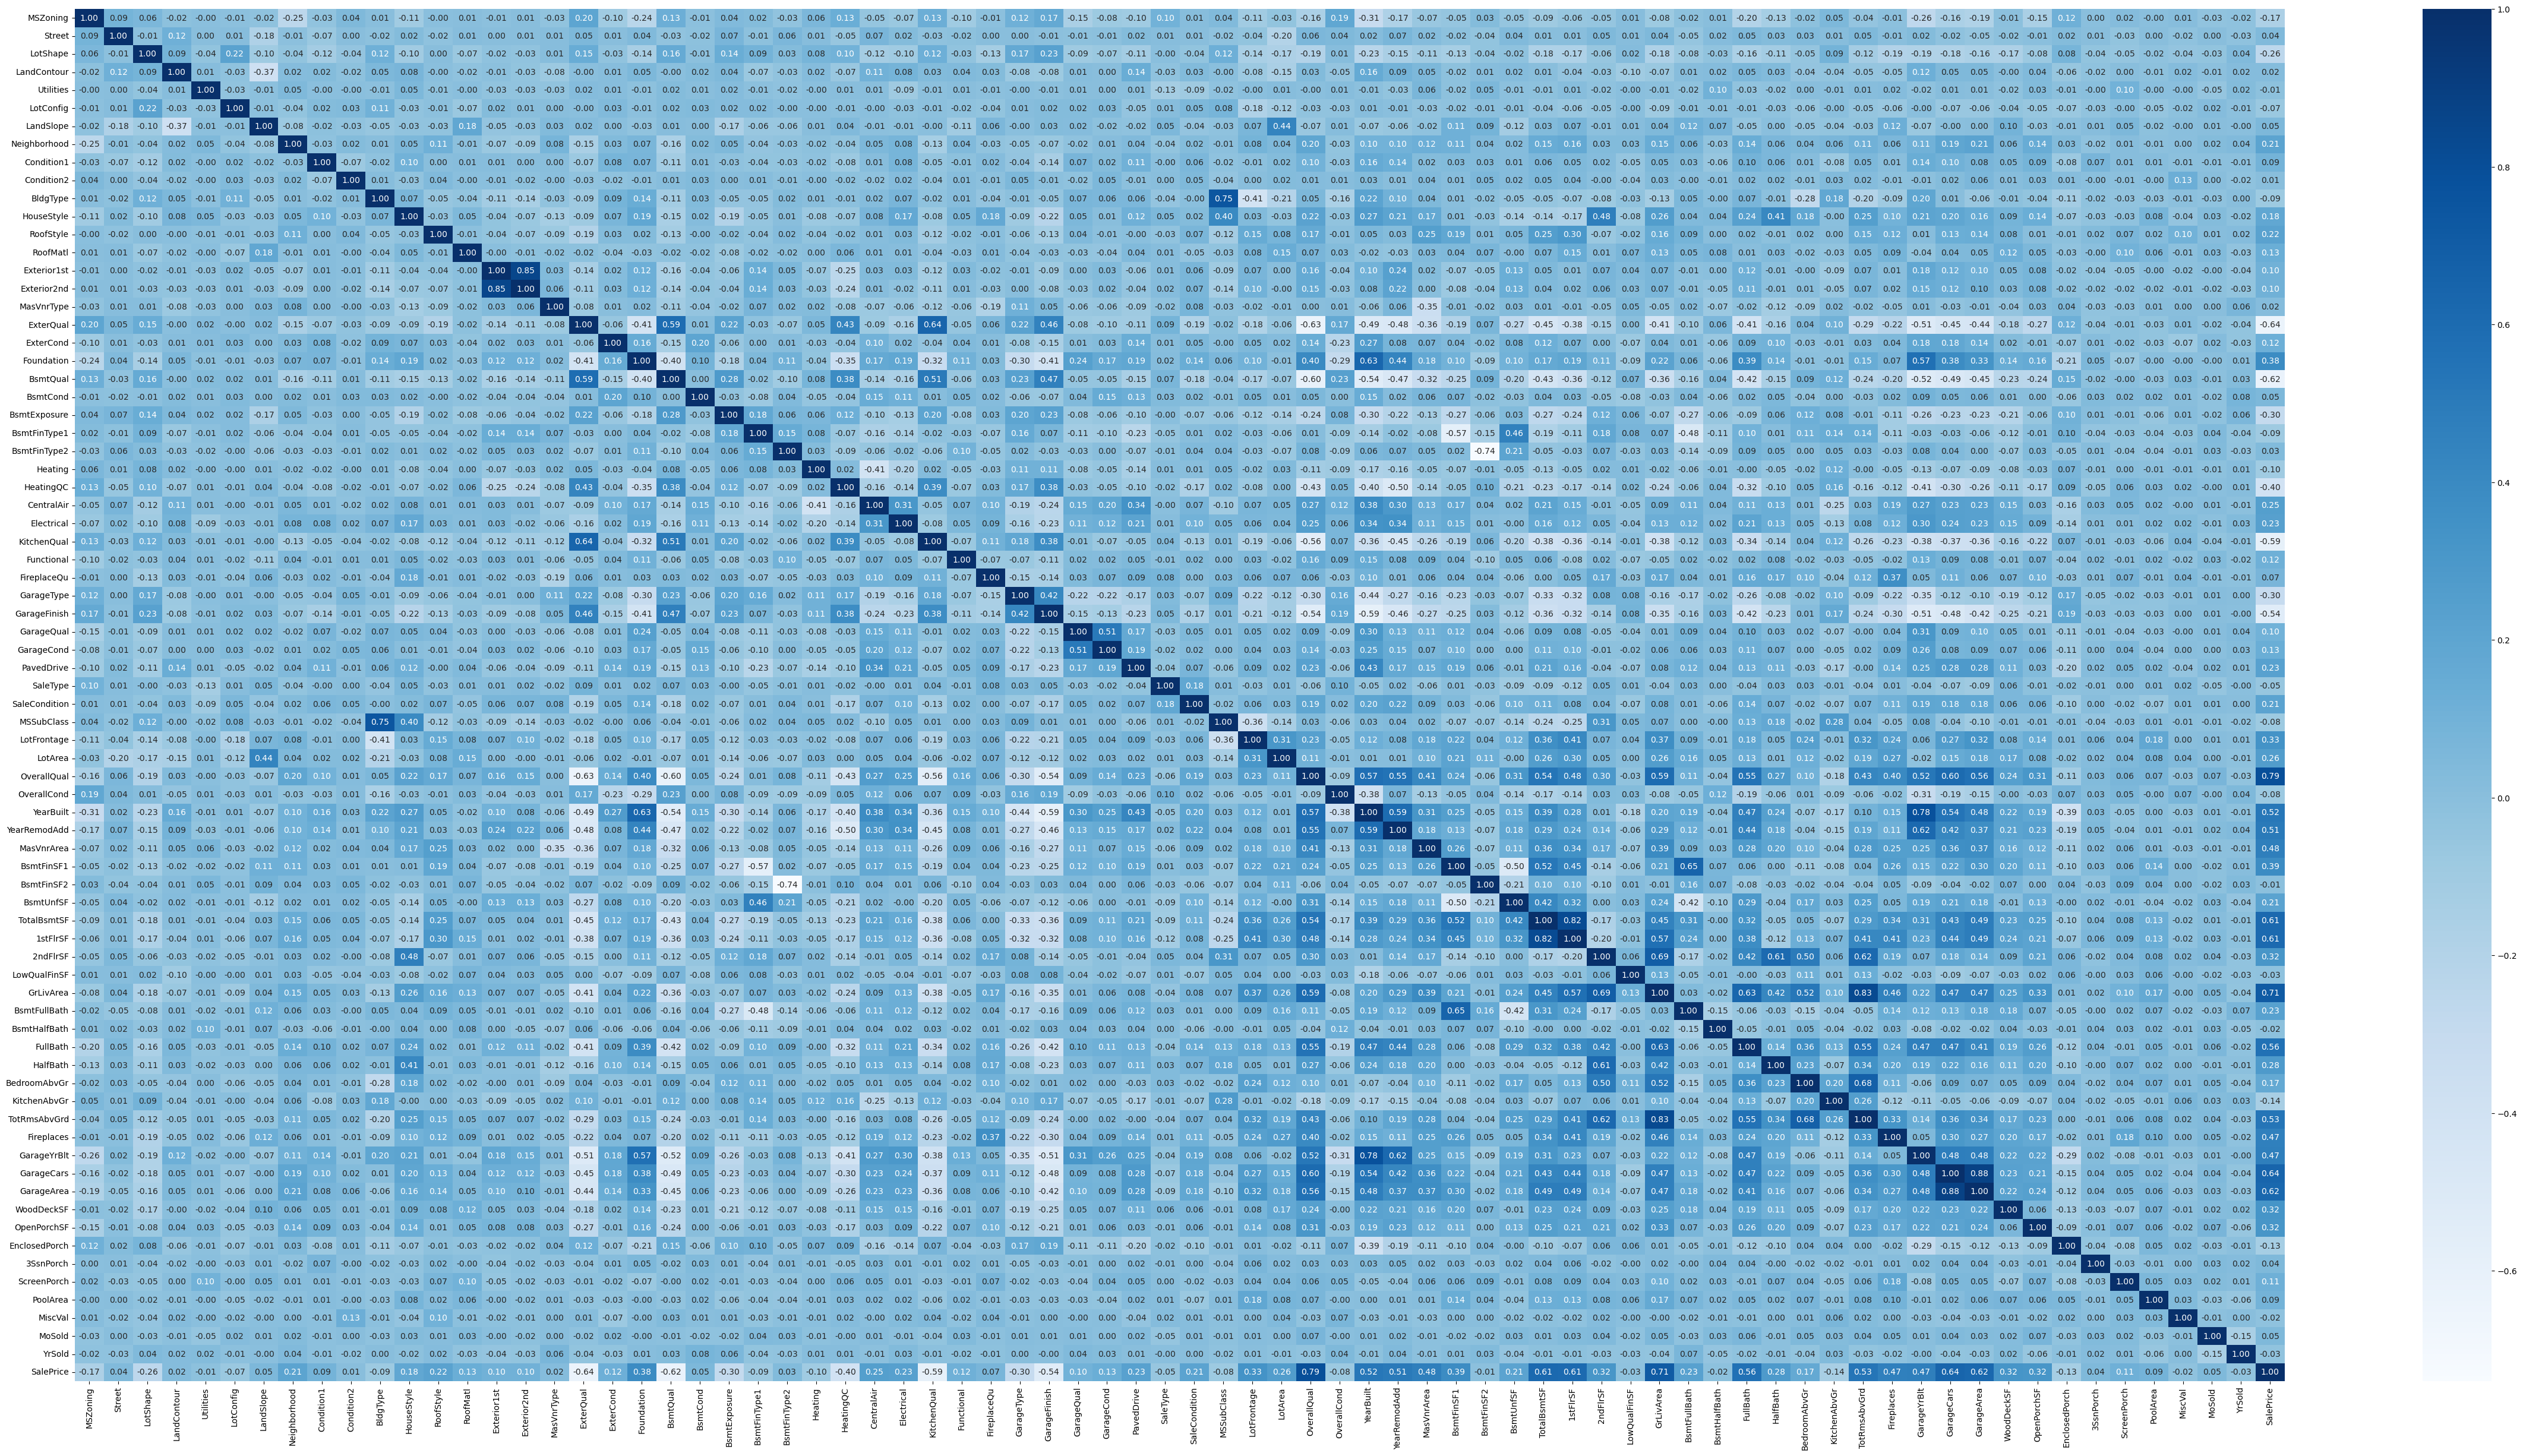

In [19]:
hous_pred_corr = hous_pred_df_new.corr()
hous_pred_corr
plt.figure(figsize = (60,30))
sns.heatmap(hous_pred_corr,cbar=True,
                 fmt='.2f',annot=True, 
                 cmap='Blues')

In [20]:
hous_no_info_cols = ['Street','Utilities','Condition2','RoofMatl','Exterior2nd','Heating','CentralAir','LowQualFinSF',
                     'BsmtHalfBath','KitchenAbvGr','Functional','GarageCond','PoolArea','MiscVal']
hous_pred_df_new.drop(columns=hous_no_info_cols)

MSZoning  LotShape  LandContour  LotConfig  LandSlope  Neighborhood  \
0            3         3            3          4          0             5   
1            3         3            3          2          0            24   
2            3         0            3          4          0             5   
3            3         0            3          0          0             6   
4            3         0            3          2          0            15   
...        ...       ...          ...        ...        ...           ...   
1455         3         3            3          4          0             8   
1456         3         3            3          4          0            14   
1457         3         3            3          4          0             6   
1458         3         3            3          4          0            12   
1459         3         3            3          4          0             7   

      Condition1  BldgType  HouseStyle  RoofStyle  ...  GarageCars  \
0              2         0           5          1  ...         2.0   
1              1         0           2          1  ...         2.0   
2              2         0           5          1  ...         2.0   
3              2         0           5          1  ...         3.0   
4              2         0           5          1  ...         3.0   
...          ...       ...         ...        ...  ...         ...   
1455           2         0           5          1  ...         2.0   
1456           2         0           2          1  ...         2.0   
1457           2         0           5          1  ...         1.0   
1458           2         0           2          3  ...         1.0   
1459           2         0           2          1  ...         1.0   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0          548.0         0.0         61.0            0.0        0.0   
1          460.0       298.0          0.0            0.0        0.0   
2          608.0         0.0         42.0            0.0        0.0   
3          642.0         0.0         35.0          272.0        0.0   
4          836.0       192.0         84.0            0.0        0.0   
...          ...         ...          ...            ...        ...   
1455       460.0         0.0         40.0            0.0        0.0   
1456       500.0       349.0          0.0            0.0        0.0   
1457       252.0         0.0         60.0            0.0        0.0   
1458       240.0       366.0          0.0          112.0        0.0   
1459       276.0       736.0         68.0            0.0        0.0   

      ScreenPorch  MoSold  YrSold  SalePrice  
0             0.0     2.0  2008.0   208500.0  
1             0.0     5.0  2007.0   181500.0  
2             0.0     9.0  2008.0   223500.0  
3             0.0     2.0  2006.0   140000.0  
4             0.0    12.0  2008.0   250000.0  
...           ...     ...     ...        ...  
1455          0.0     8.0  2007.0   175000.0  
1456          0.0     2.0  2010.0   210000.0  
1457          0.0     5.0  2010.0   266500.0  
1458          0.0     4.0  2010.0   142125.0  
1459          0.0     6.0  2008.0   147500.0  

[1460 rows x 62 columns]

<AxesSubplot:>

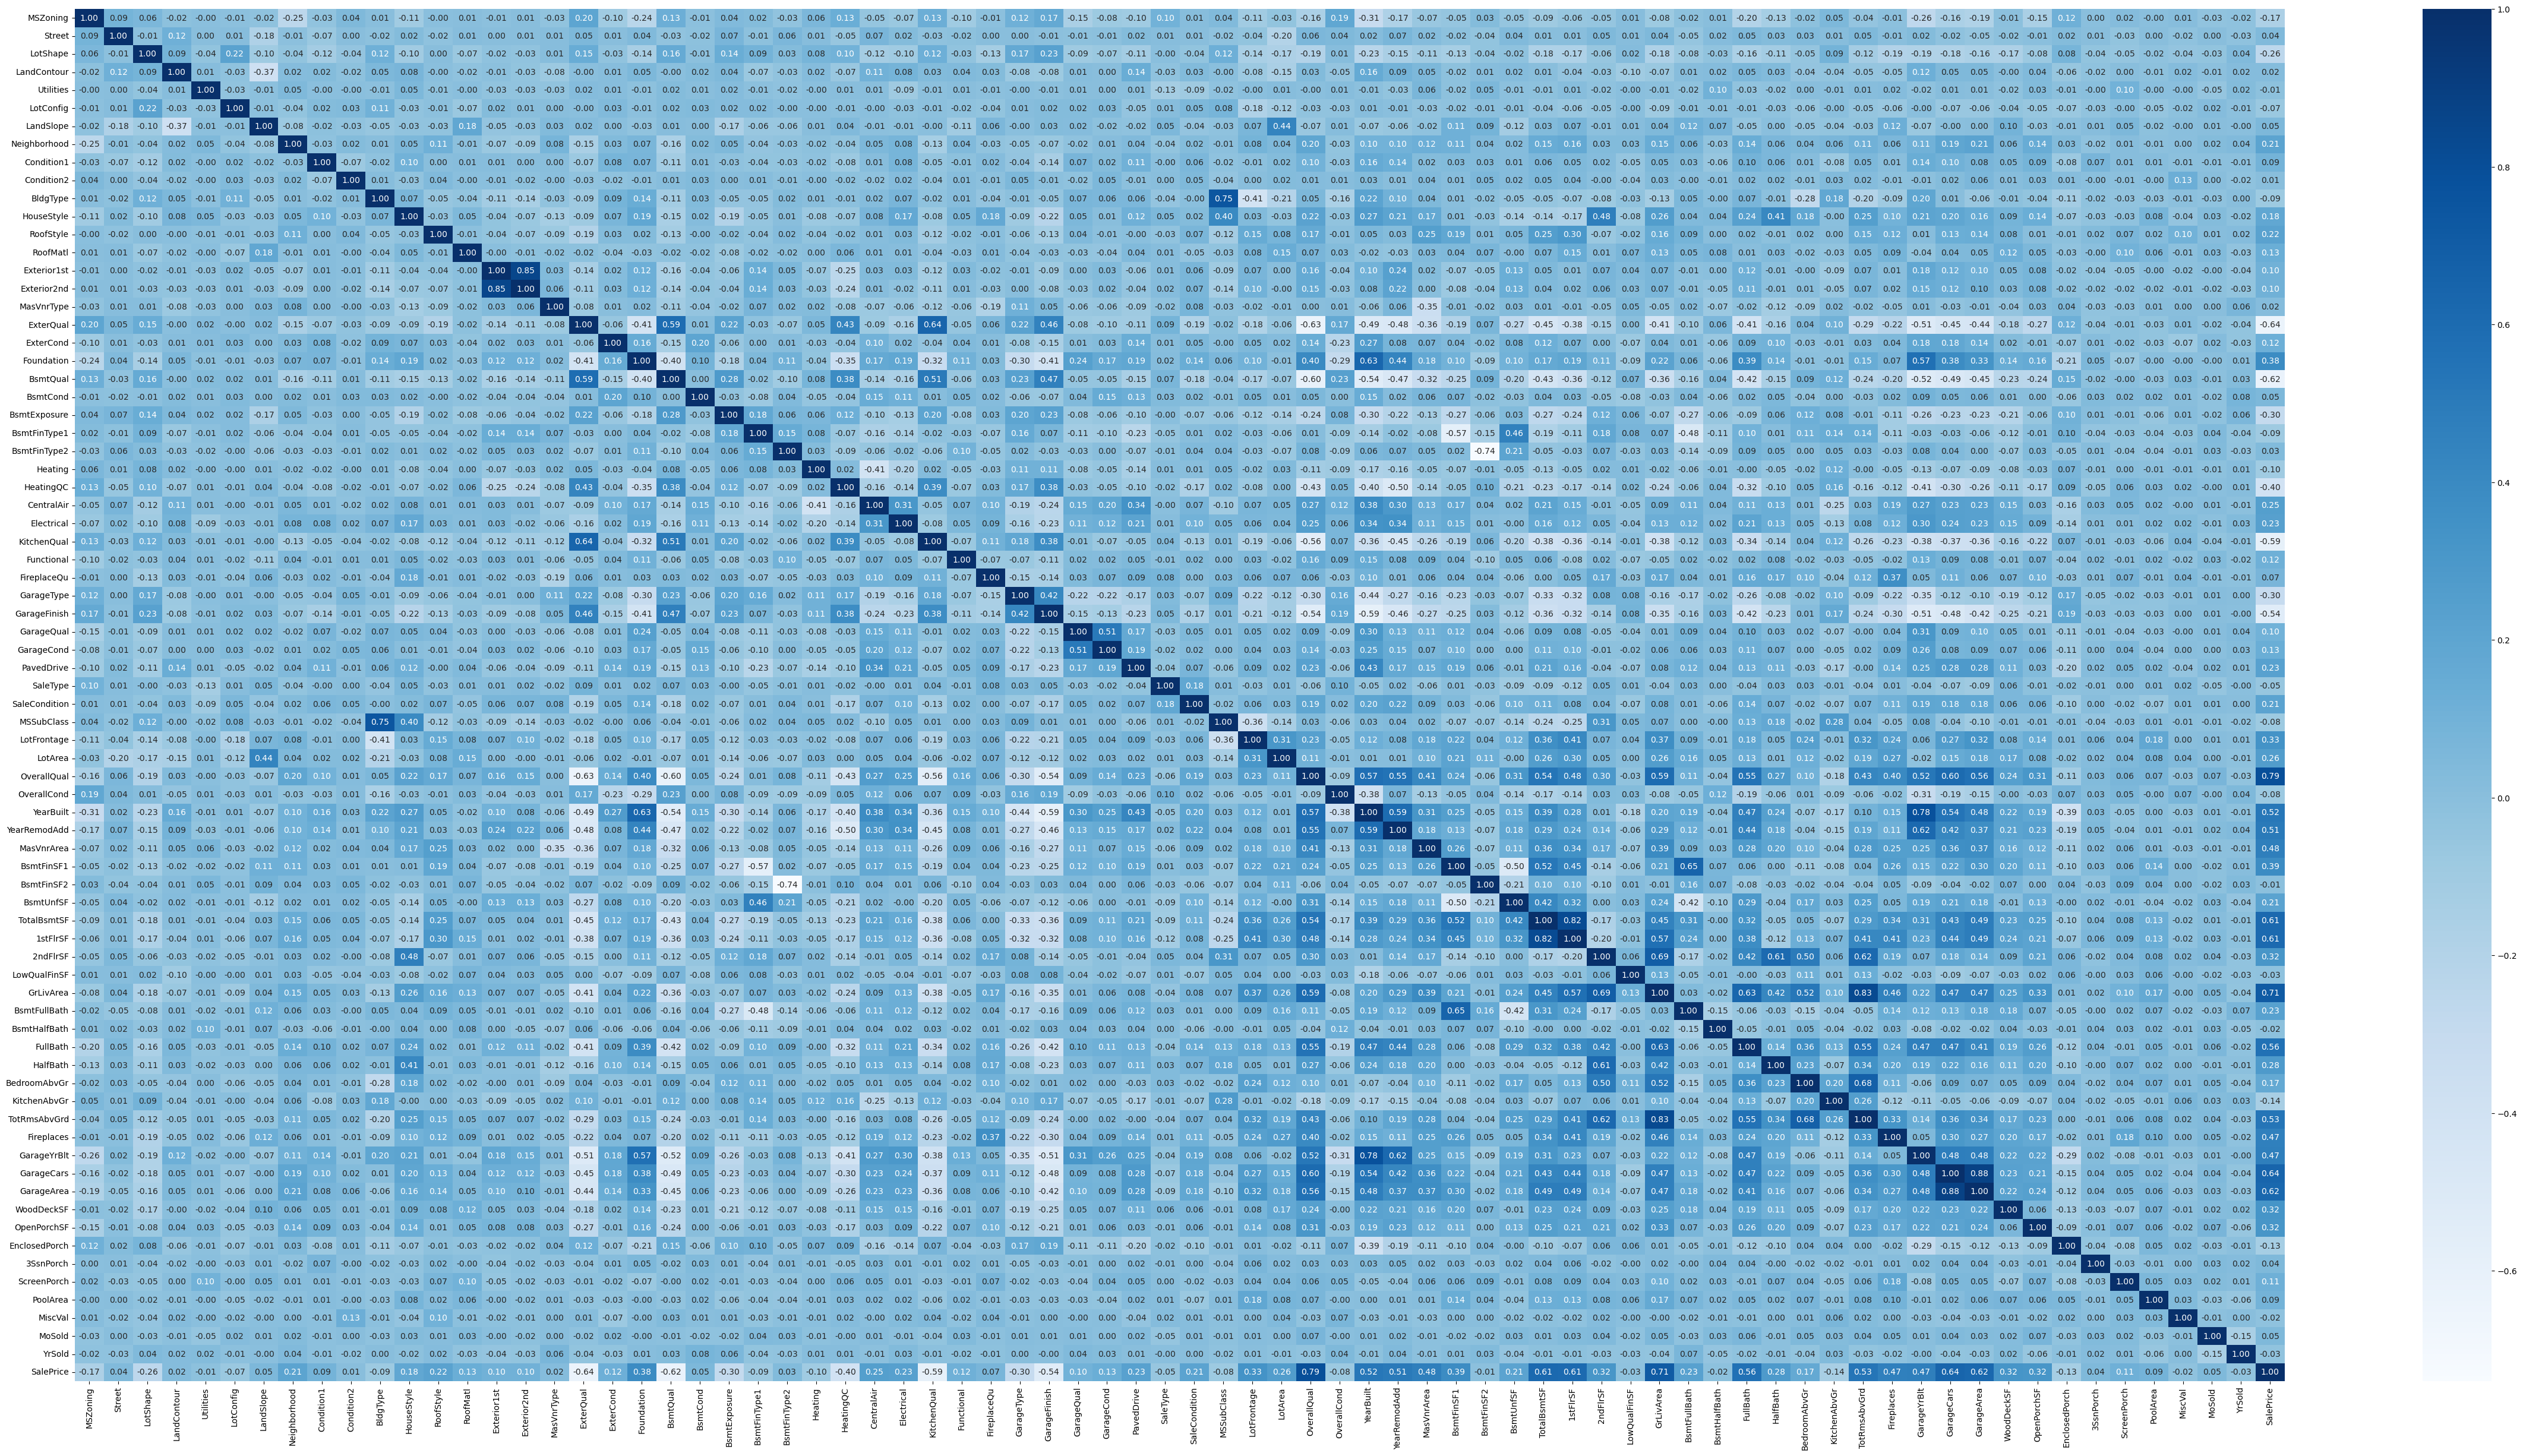

In [21]:
hous_pred_corr = hous_pred_df_new.corr()
hous_pred_corr
plt.figure(figsize = (60,30))
sns.heatmap(hous_pred_corr,cbar=True,
                 fmt='.2f',annot=True, 
                 cmap='Blues')

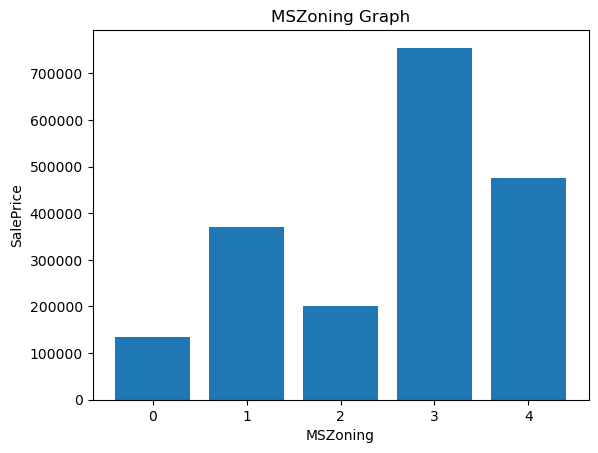

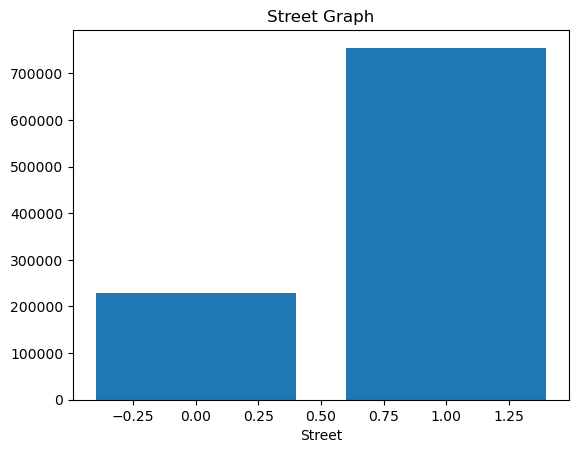

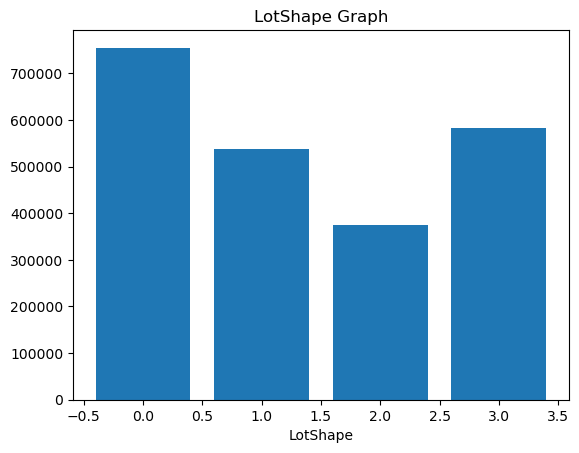

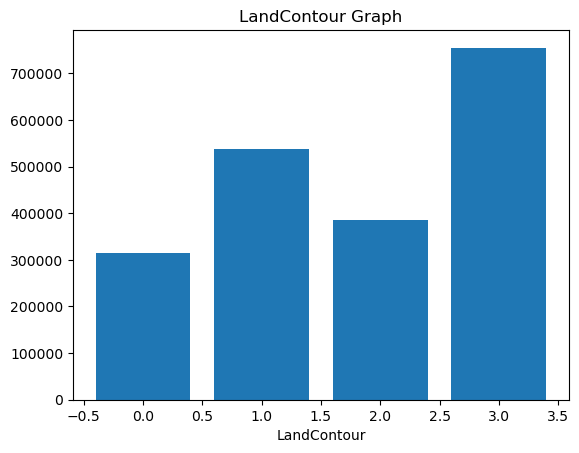

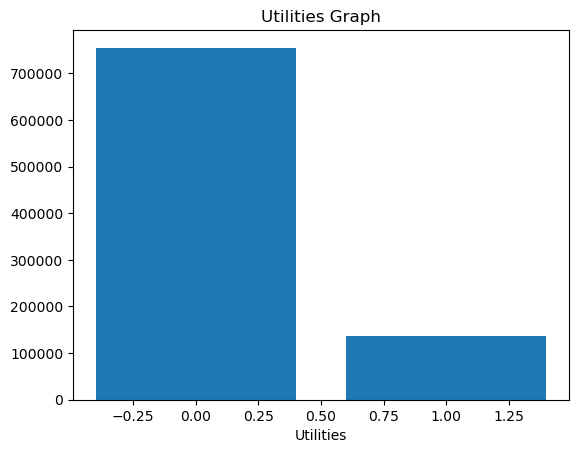

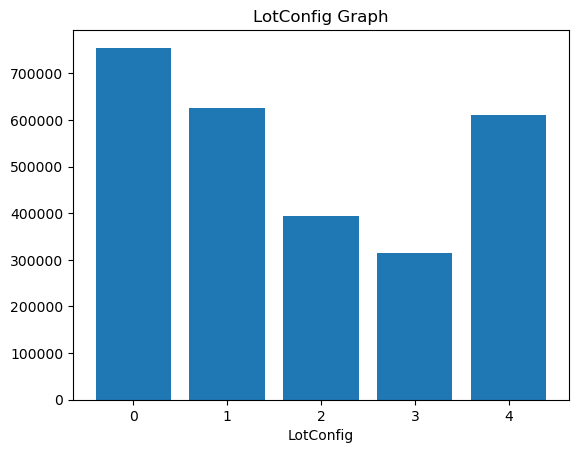

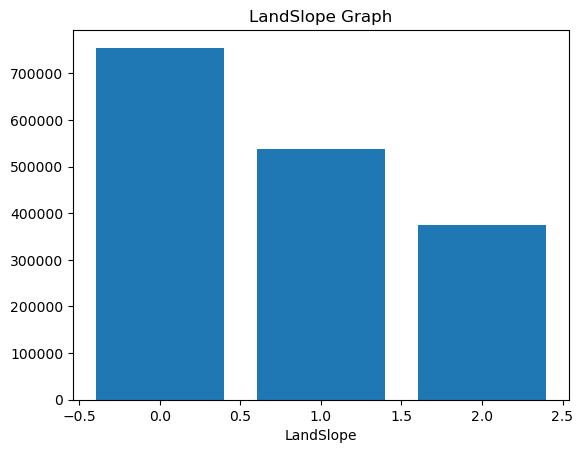

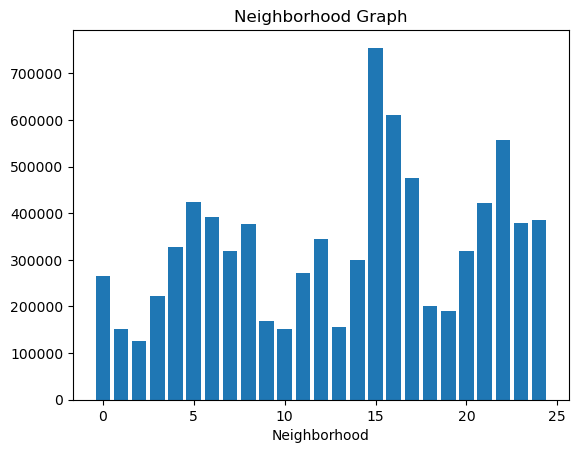

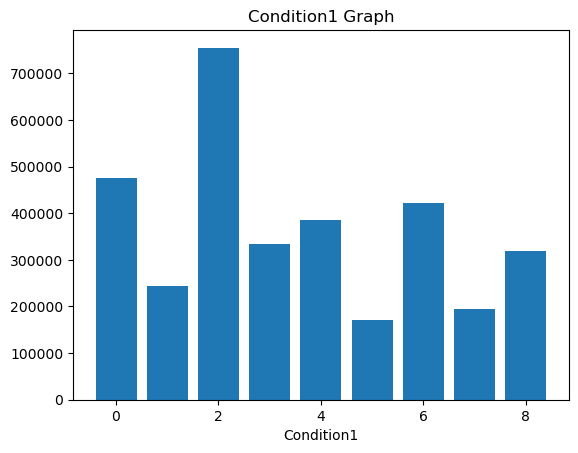

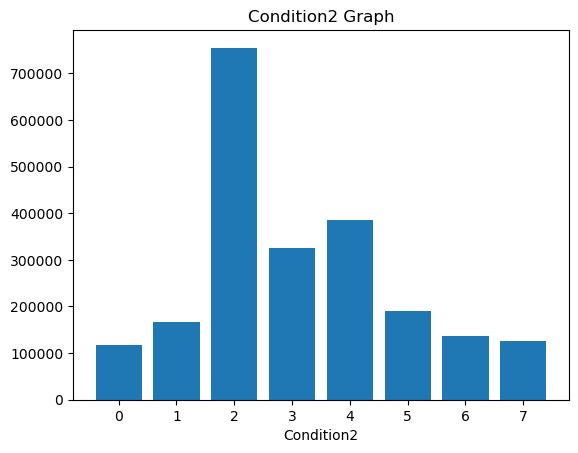

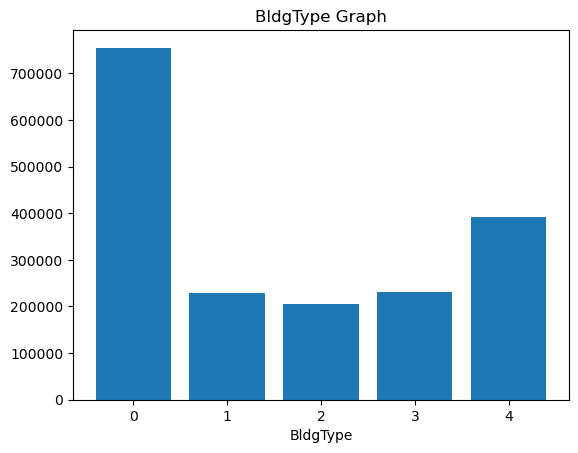

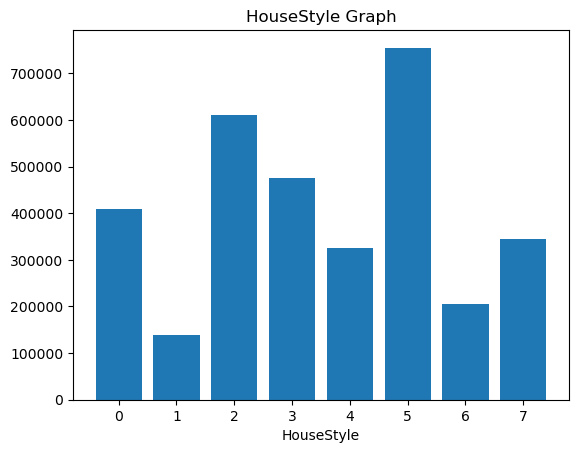

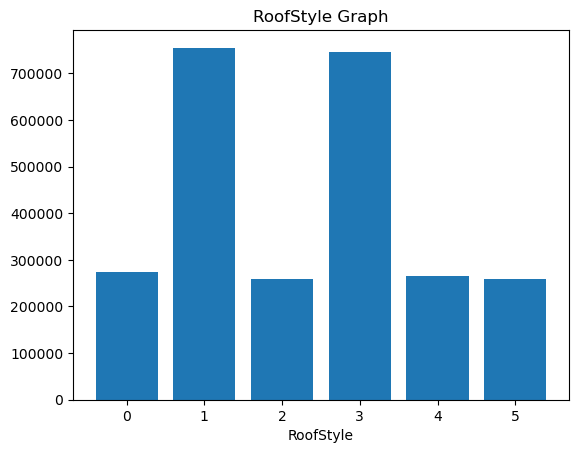

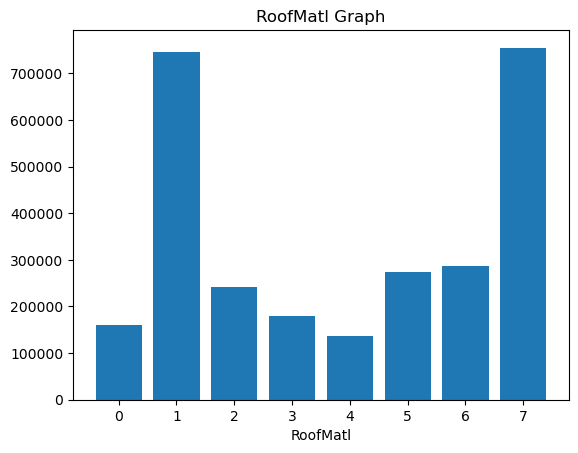

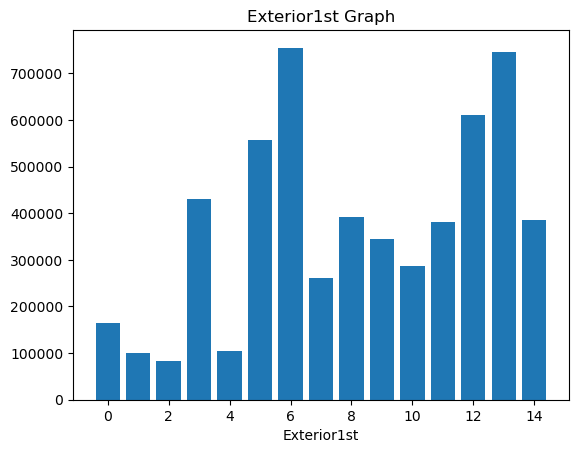

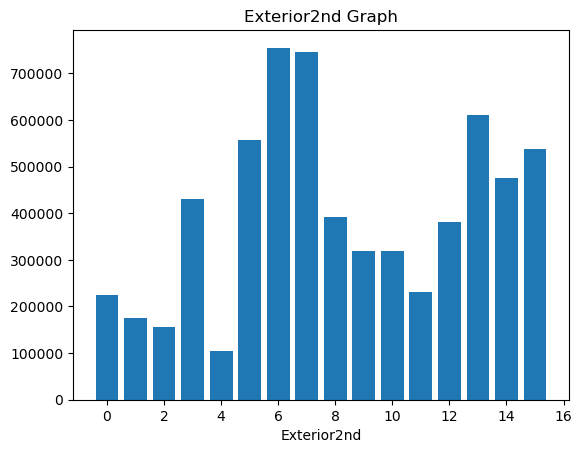

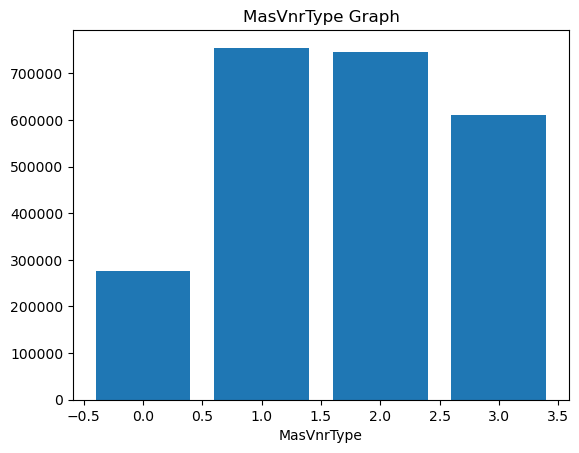

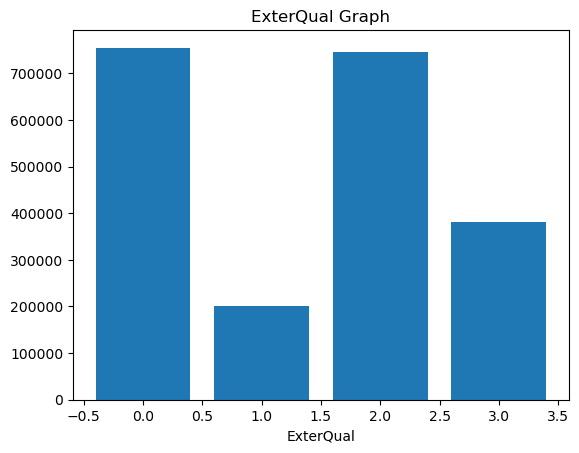

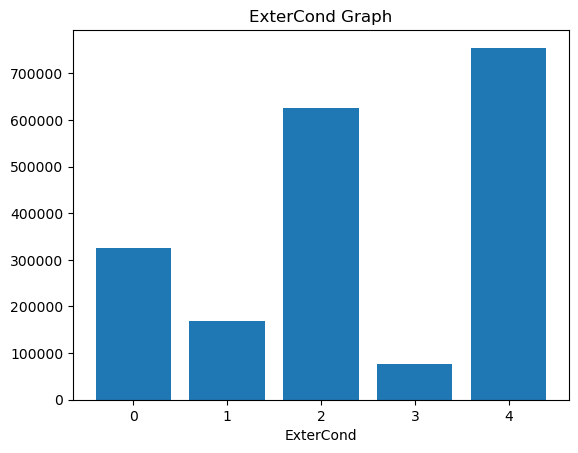

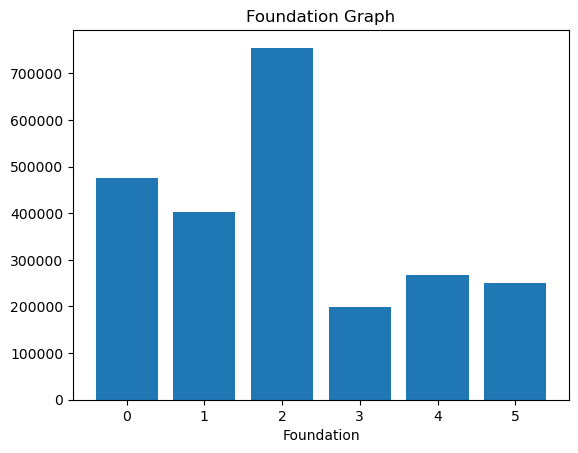

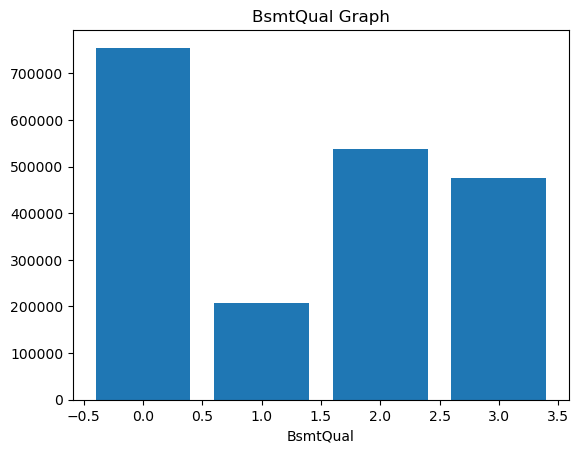

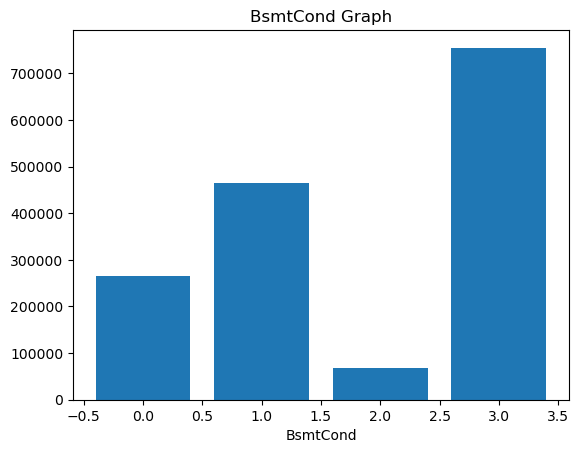

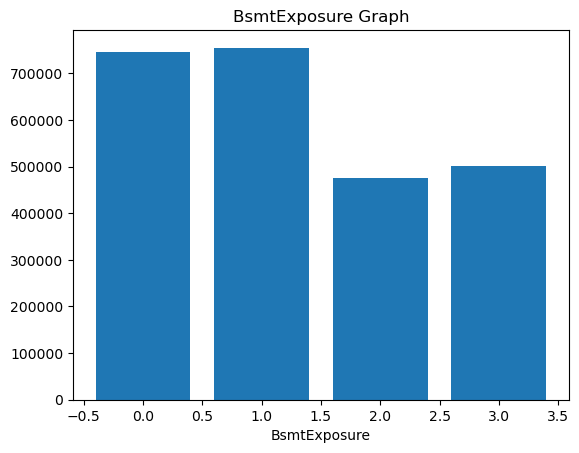

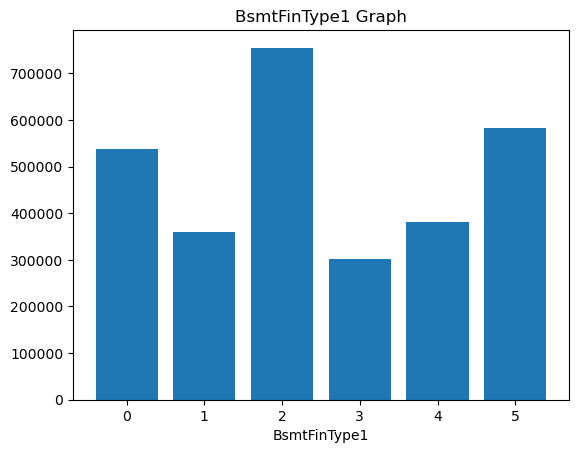

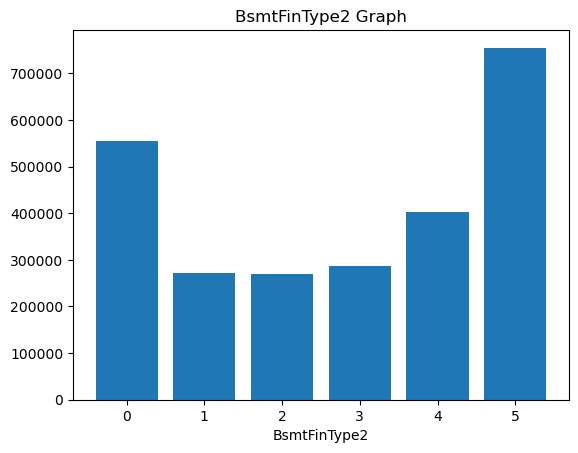

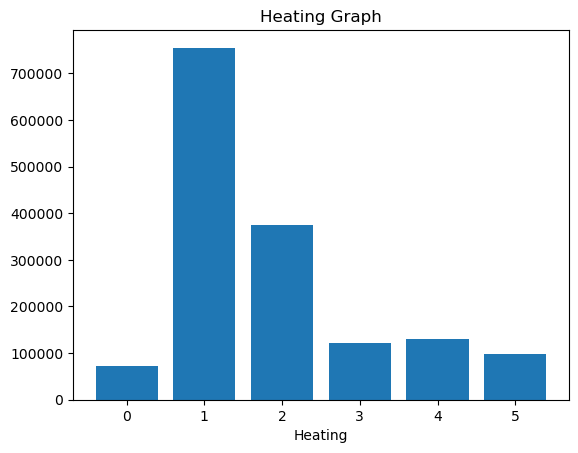

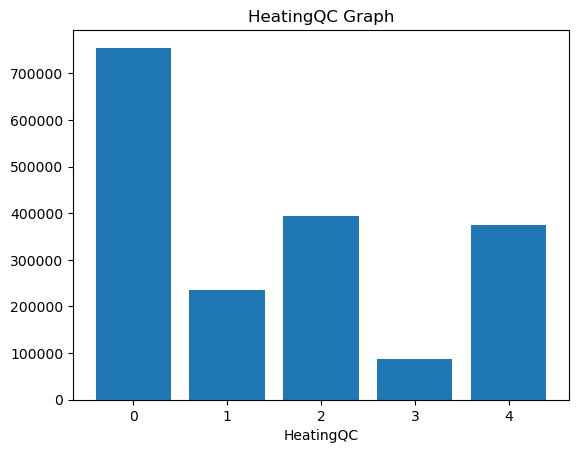

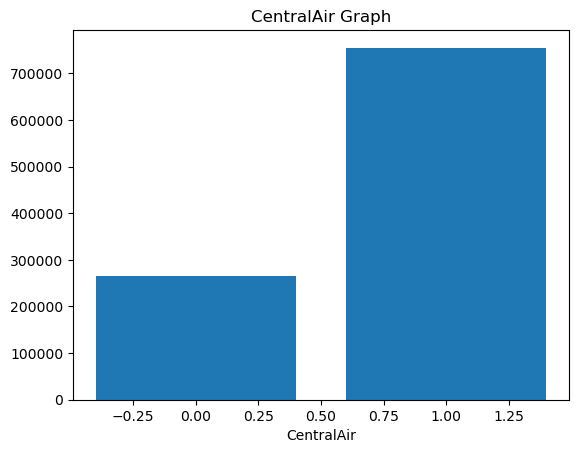

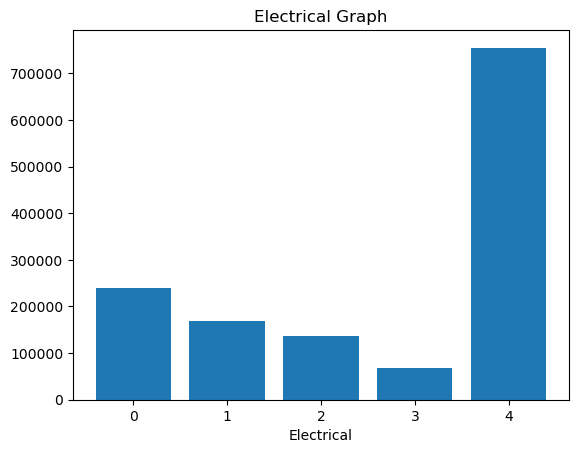

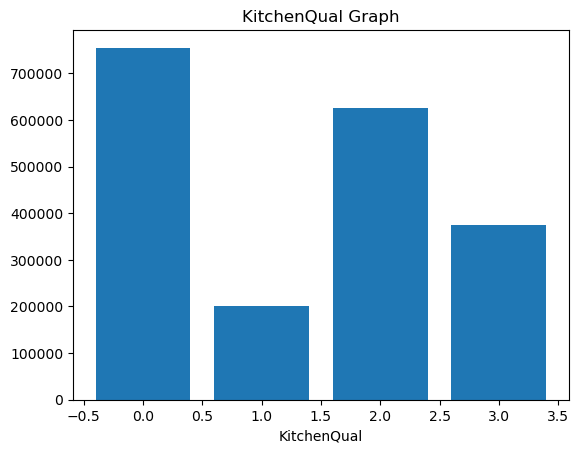

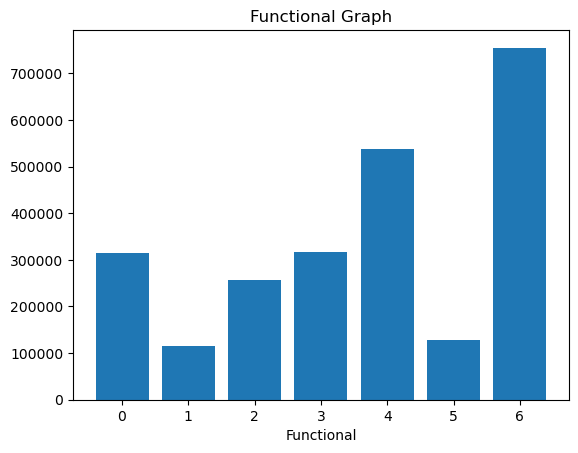

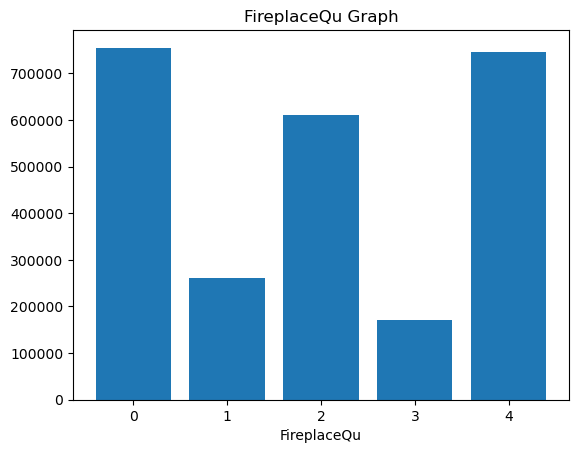

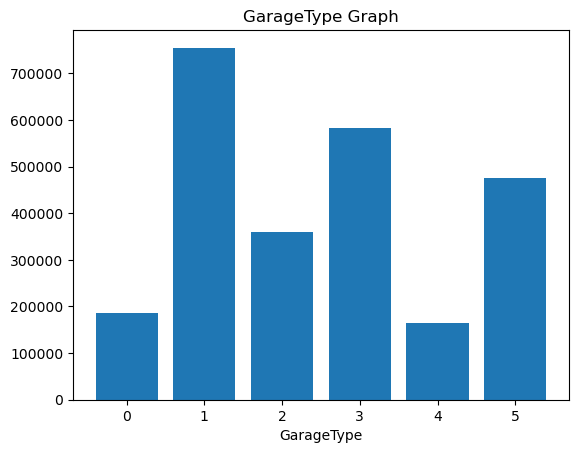

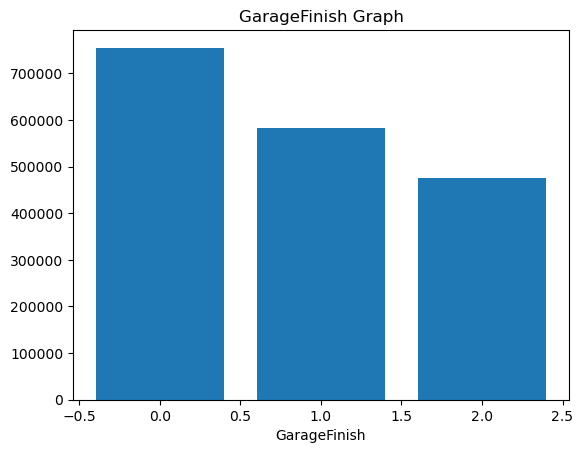

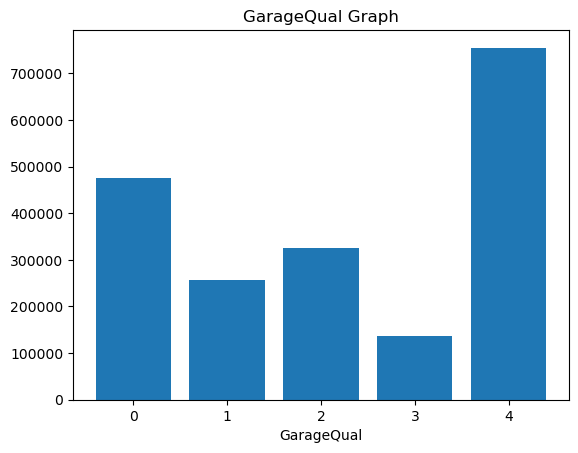

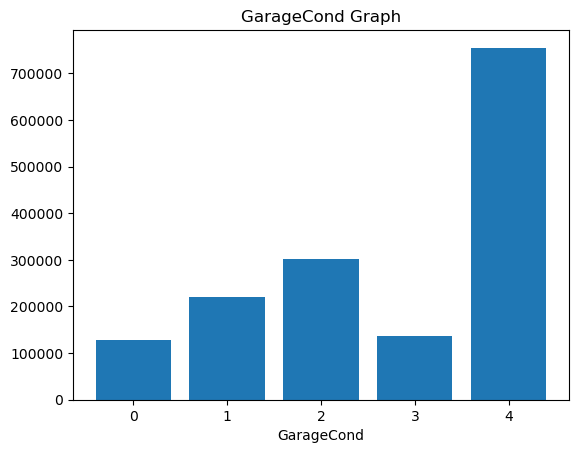

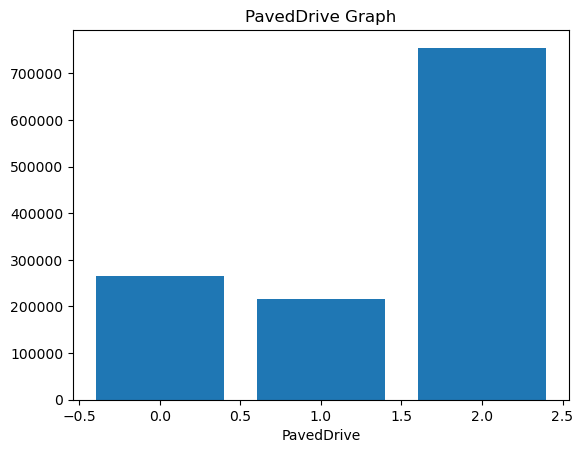

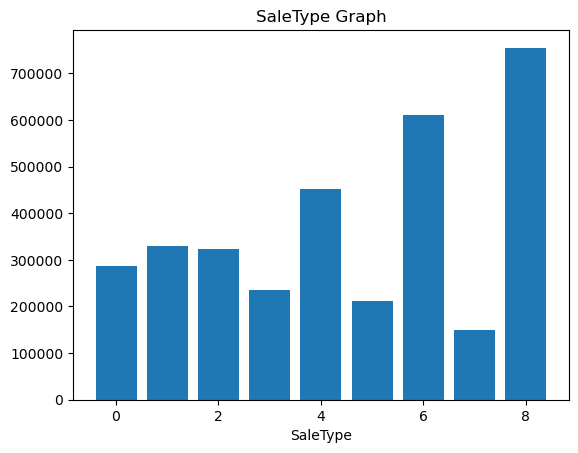

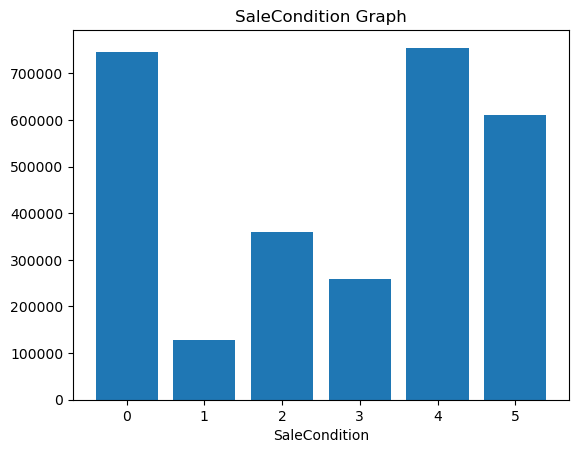

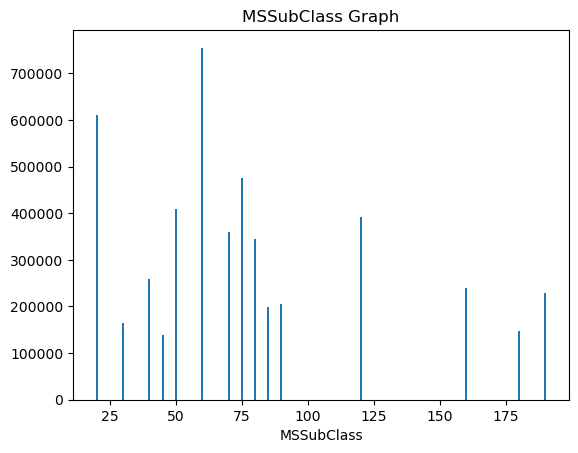

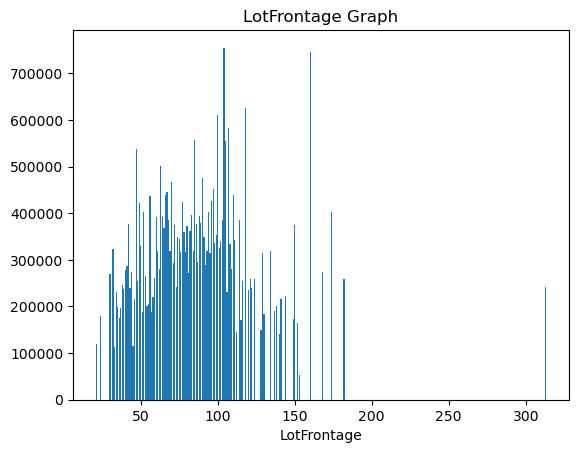

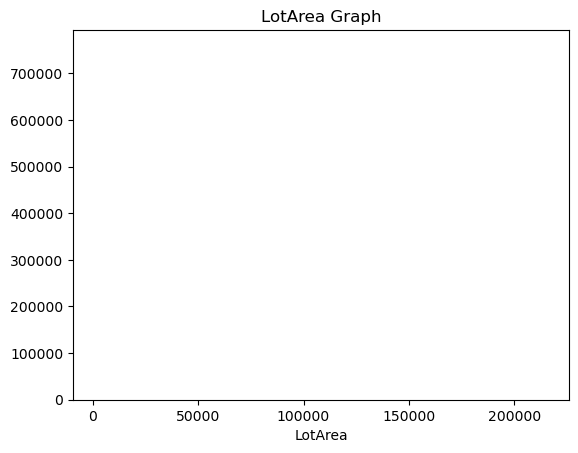

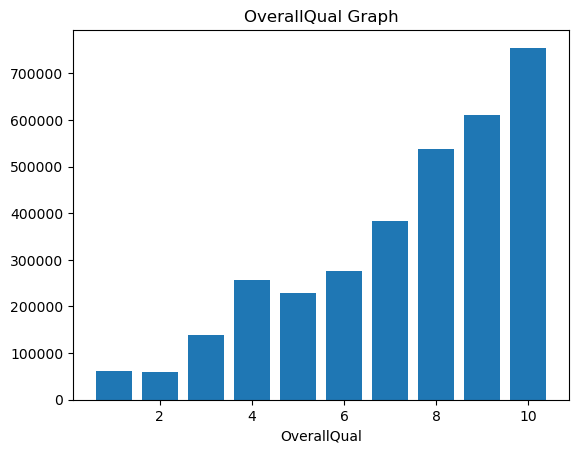

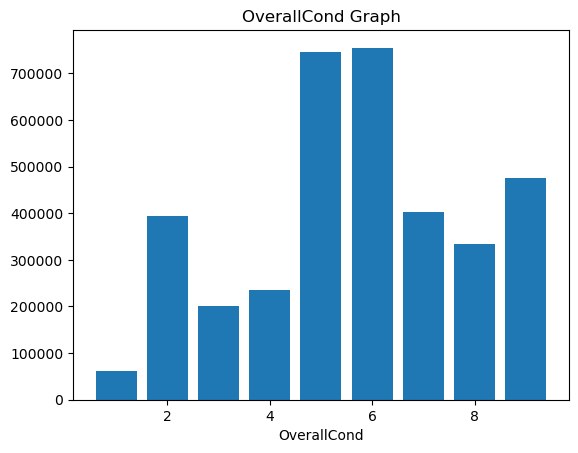

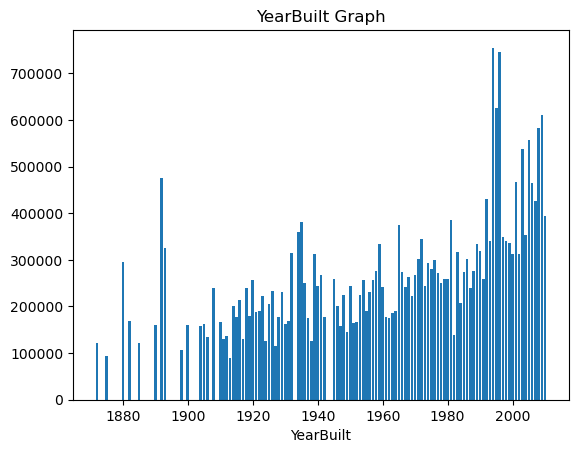

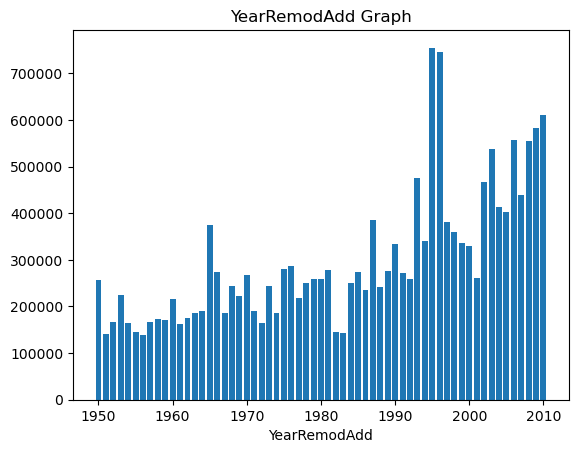

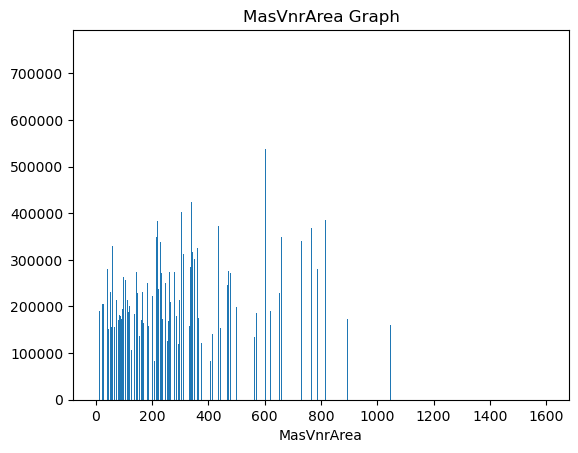

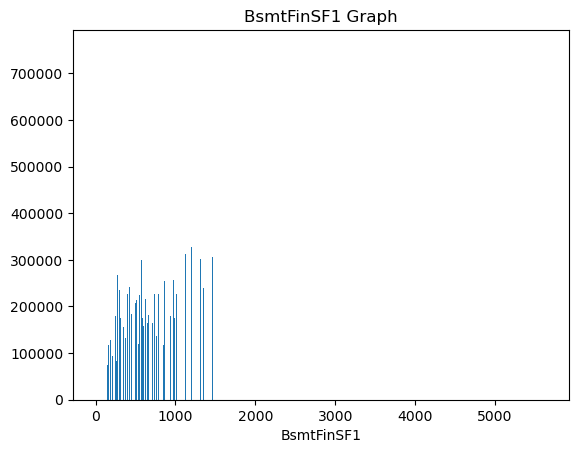

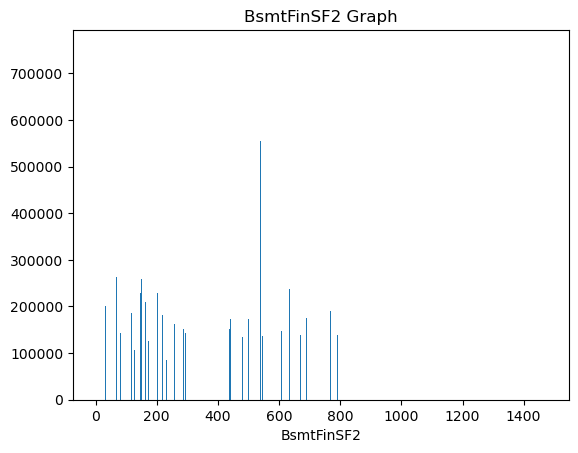

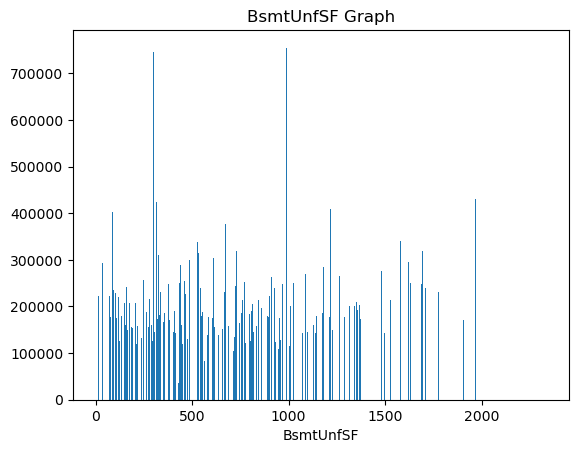

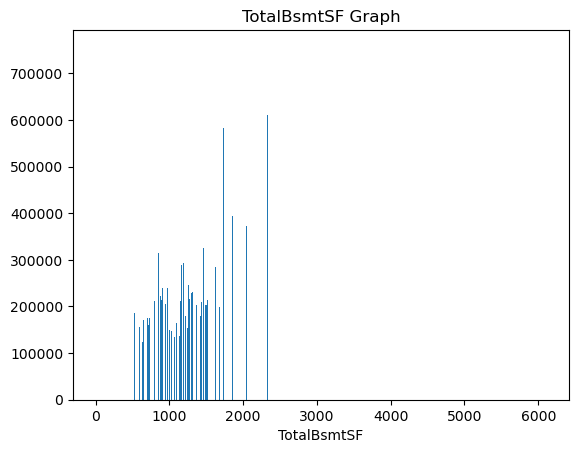

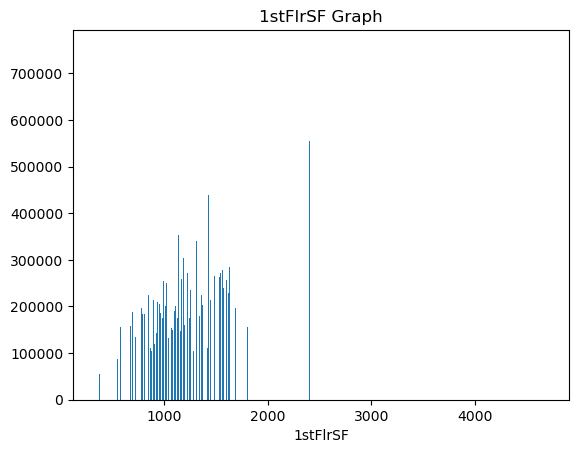

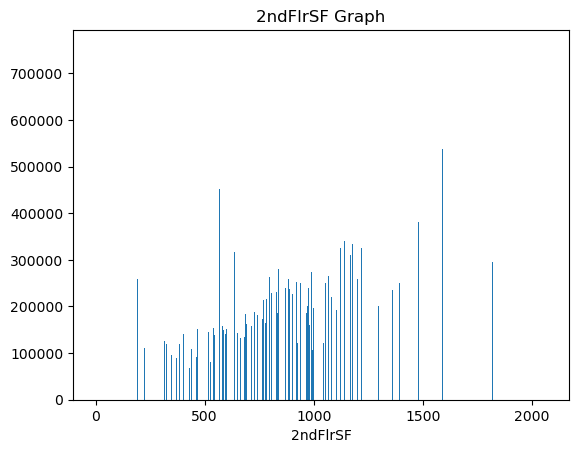

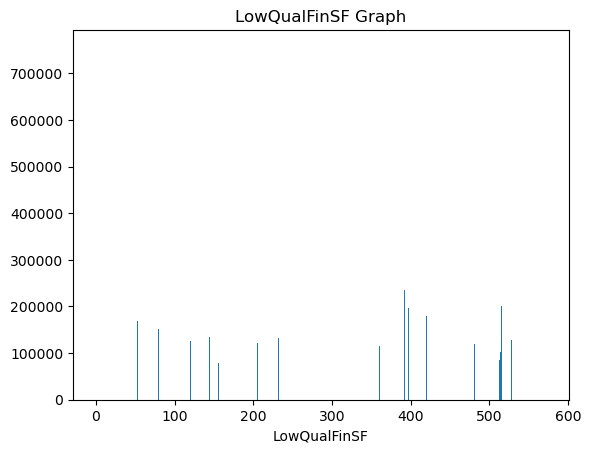

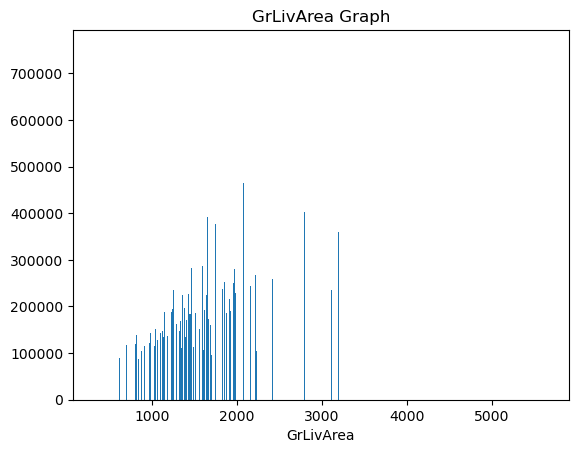

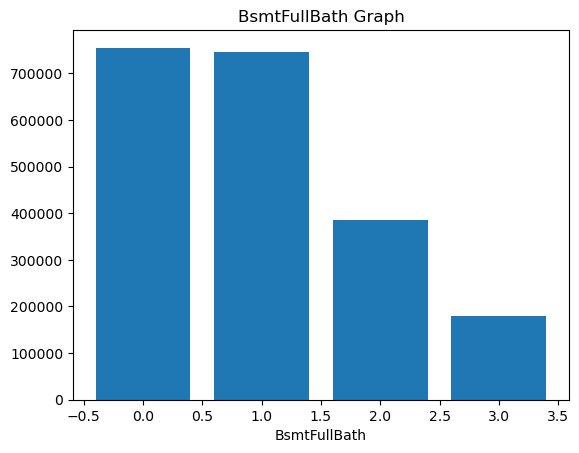

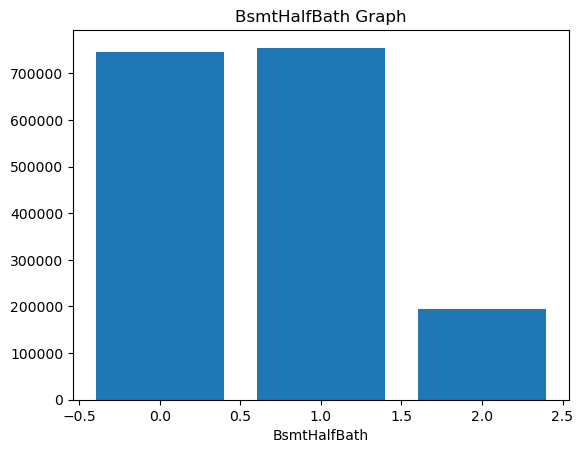

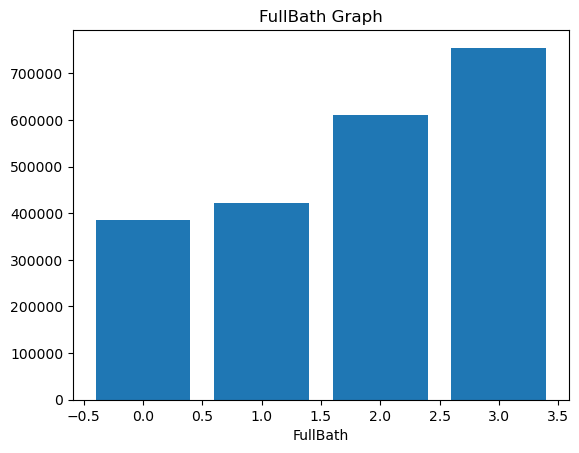

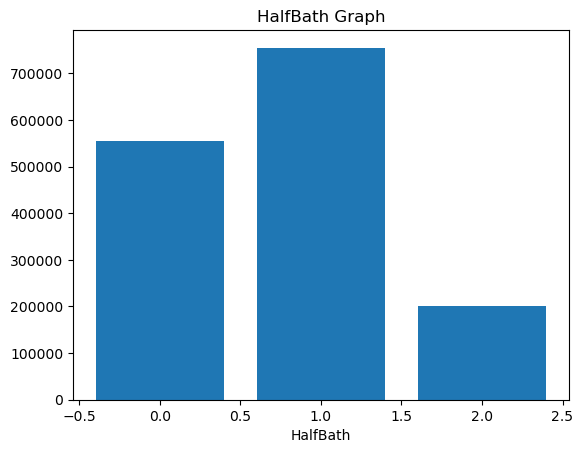

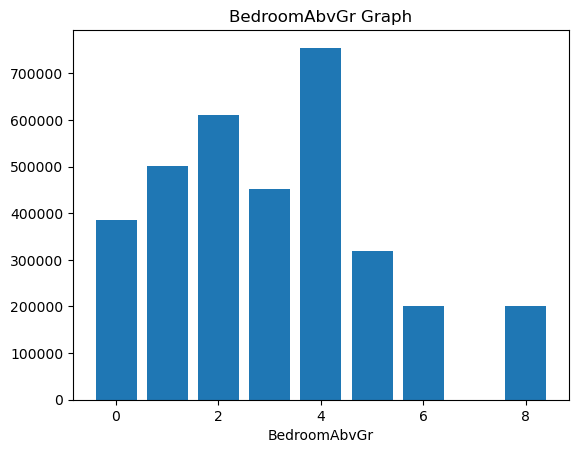

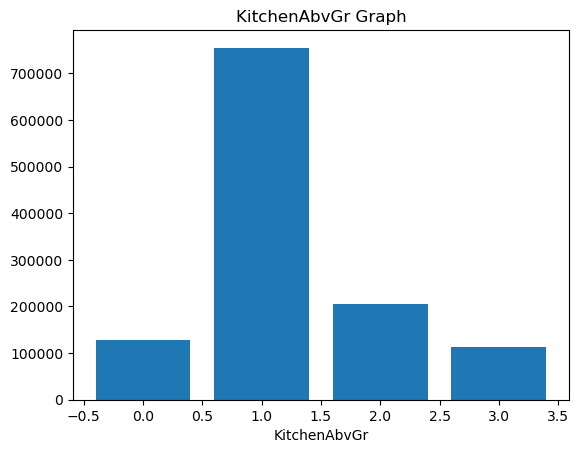

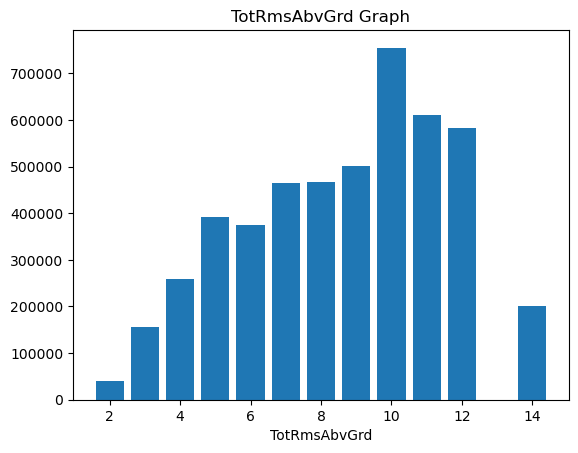

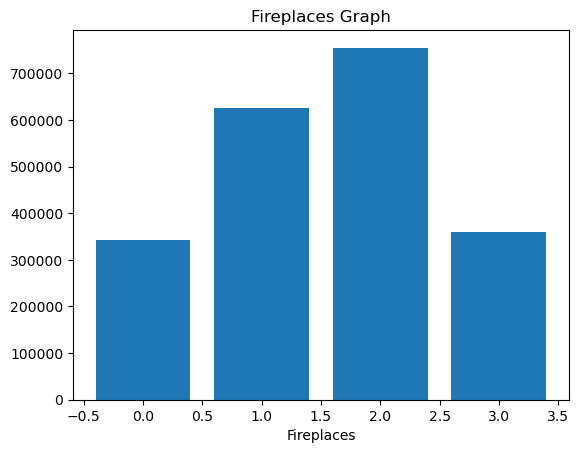

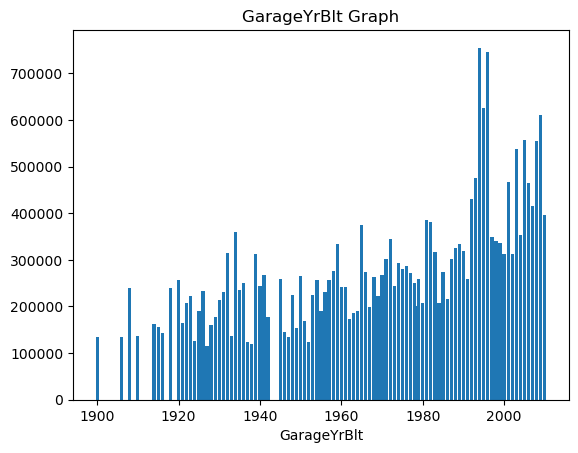

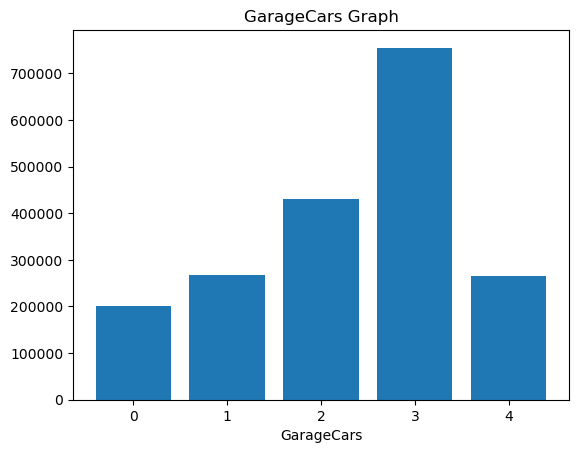

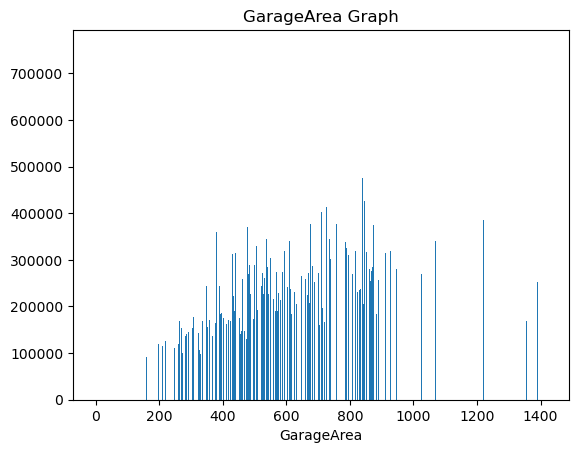

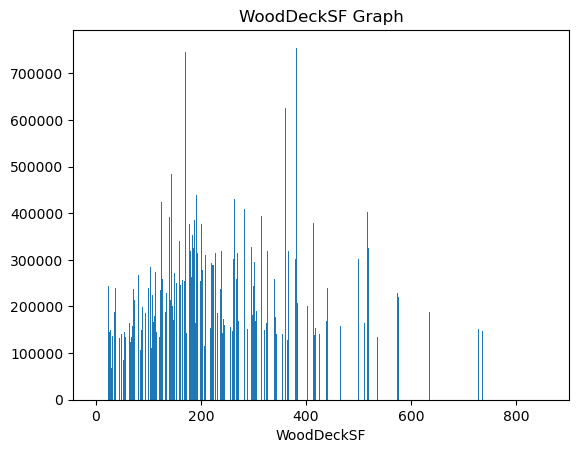

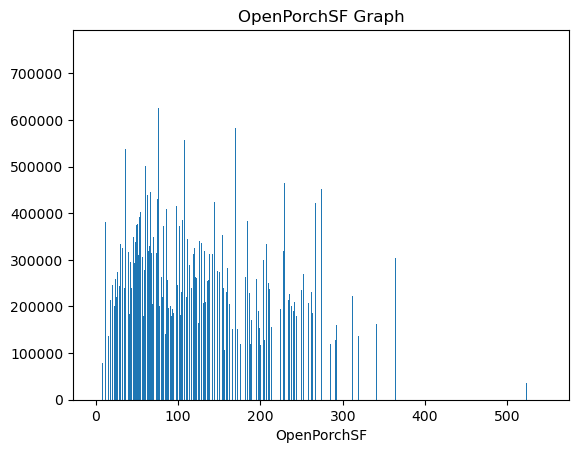

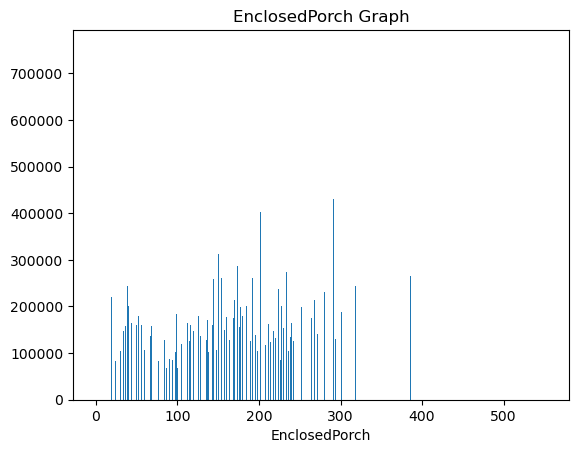

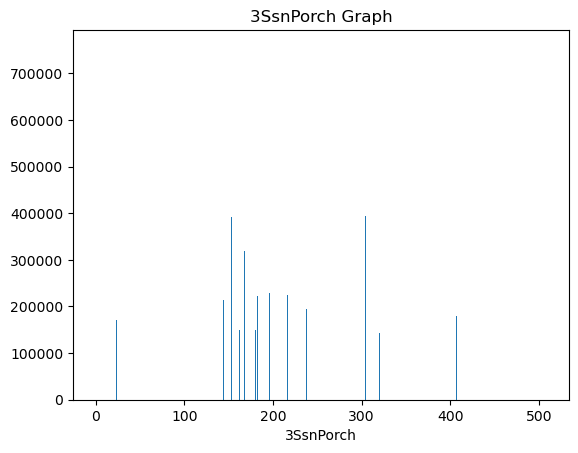

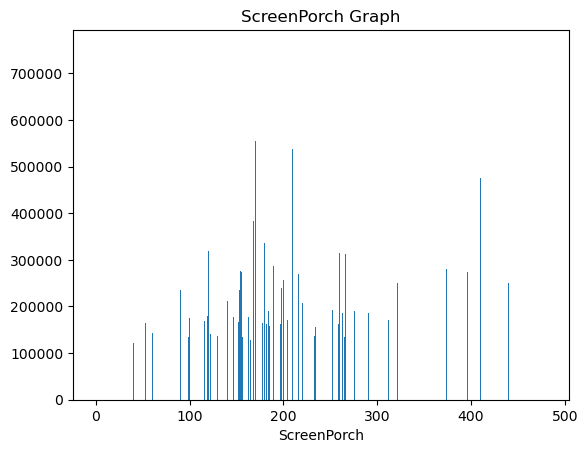

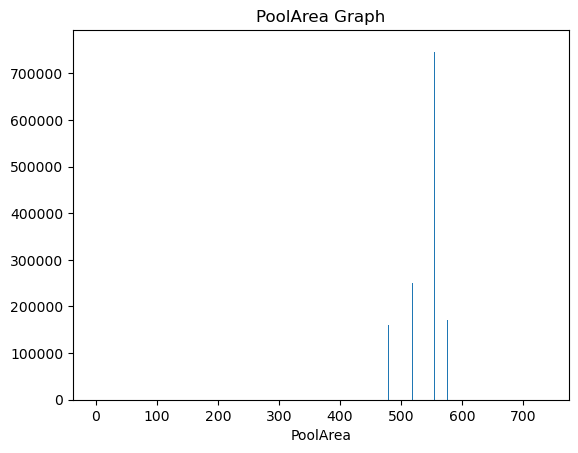

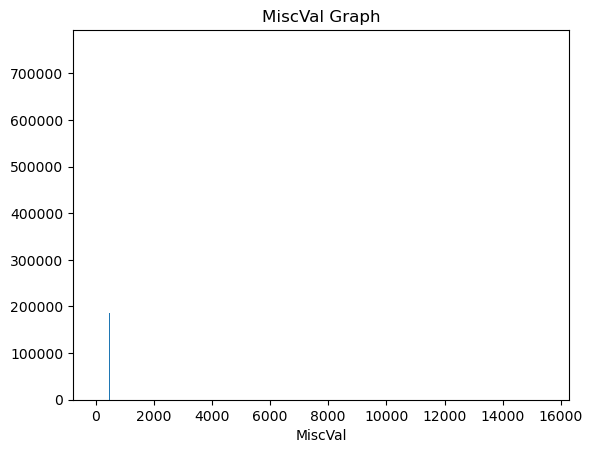

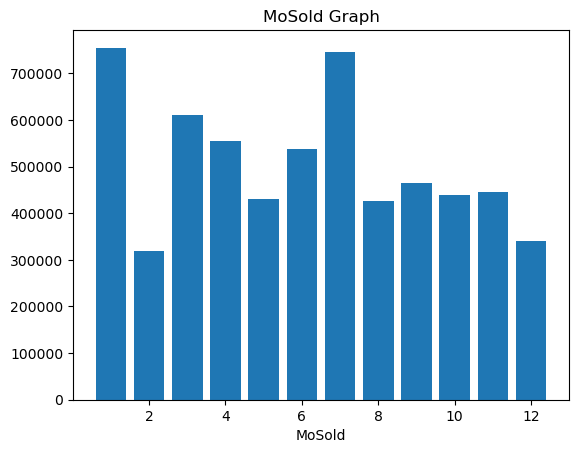

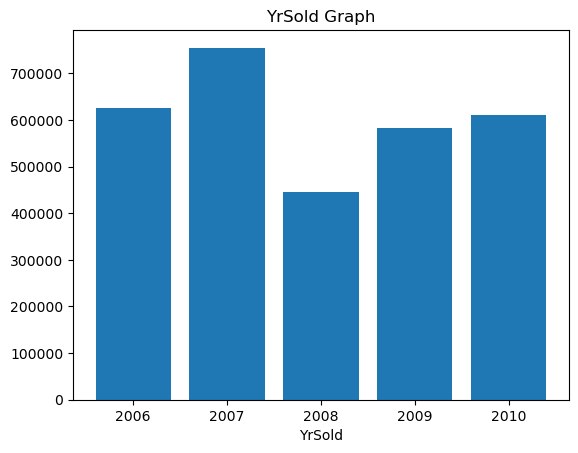

In [22]:
houscol = hous_pred_df_new.columns
houscol = houscol.tolist()
houscol.remove('SalePrice')
y=hous_pred_df_new['SalePrice']
plt.ylabel('SalePrice')
for col in houscol:
    x = hous_pred_df_new.loc[:,col]
    plt.xlabel(col)
    title = col+' Graph'
    plt.title(title)
    plt.bar(x,y)
    plt.show()

In [23]:
hous_pred_x = hous_pred_df_new.drop('SalePrice',axis=1)
hous_pred_y = hous_pred_df_new['SalePrice']

In [24]:
from sklearn.model_selection import train_test_split
hous_pred_x_train, hous_pred_x_test, hous_pred_y_train, hous_pred_y_test = train_test_split(
    hous_pred_x, hous_pred_y, test_size=0.20, random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression
hous_pred_lr = LinearRegression()
hous_pred_lr_fit =hous_pred_lr.fit(hous_pred_x_train,hous_pred_y_train)

In [26]:
hous_pred_lr_predict = hous_pred_lr.predict(hous_pred_x_test)

In [27]:
hous_pred_lr_compare = pd.DataFrame({'Actual': hous_pred_y_test, 'Predicted': hous_pred_lr_predict})
hous_pred_lr_compare.head(25)

Actual      Predicted
529   200624.0  217749.256782
491   133000.0  174610.285111
459   110000.0   94456.009442
279   192000.0  215076.456124
655    88000.0   92634.727695
1013   85000.0   77219.516880
1403  282922.0  242280.710311
601   141000.0  139167.185801
1182  745000.0  493479.445680
687   148800.0  157843.598403
1317  208900.0  198260.042949
1003  136905.0  -46814.680230
1300  225000.0  246351.768719
1392  123000.0  111632.630723
1014  119200.0  123377.327230
254   145000.0  140043.597767
1322  190000.0  233422.135155
89    123600.0  109339.927774
31    149350.0  134144.677157
482   155000.0  177182.954595
142   166000.0  139713.332318
811   144500.0  156545.259821
52    110000.0   76963.291123
857   174000.0  151145.210960
1159  185000.0  203035.521832

In [28]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(hous_pred_y_test, hous_pred_lr_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(hous_pred_y_test, hous_pred_lr_predict))) 
print("R2 score =", round(metrics.r2_score(hous_pred_y_test, hous_pred_lr_predict), 2))

MSE: 2856479627.796437
RMSE: 53446.044079954474
R2 score = 0.59


In [29]:
from sklearn.ensemble import GradientBoostingRegressor
hous_pred_gbr = GradientBoostingRegressor()
hous_pred_gbr_fit =hous_pred_gbr.fit(hous_pred_x_train,hous_pred_y_train)

In [30]:
hous_pred_gbr_predict = hous_pred_gbr.predict(hous_pred_x_test)

In [31]:
hous_pred_gbr_compare = pd.DataFrame({'Actual': hous_pred_y_test, 'Predicted': hous_pred_gbr_predict})
hous_pred_gbr_compare.head(25)

Actual      Predicted
529   200624.0  223978.976827
491   133000.0  158768.733619
459   110000.0  106476.963013
279   192000.0  216093.961536
655    88000.0   90612.086404
1013   85000.0  101017.293511
1403  282922.0  258104.159088
601   141000.0  114145.983096
1182  745000.0  551032.070589
687   148800.0  157664.792502
1317  208900.0  204854.304251
1003  136905.0  145513.834964
1300  225000.0  231125.697325
1392  123000.0  125797.998447
1014  119200.0  130107.068844
254   145000.0  150018.108906
1322  190000.0  223747.550203
89    123600.0  129094.984419
31    149350.0  138265.586720
482   155000.0  202147.018406
142   166000.0  125905.546974
811   144500.0  140301.967629
52    110000.0  113462.442139
857   174000.0  155628.449604
1159  185000.0  187351.694374

In [32]:
print('MSE:', metrics.mean_squared_error(hous_pred_y_test, hous_pred_gbr_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(hous_pred_y_test, hous_pred_gbr_predict)))
print("R2 score =", round(metrics.r2_score(hous_pred_y_test, hous_pred_gbr_predict), 2))

MSE: 842314360.6961459
RMSE: 29022.652544110195
R2 score = 0.88
